<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Signals and Systems
</font>
<hr/>
<font color="#800080" size=5>
Assignment 2
<br>
</font>
<font size=5>
Instructor: Dr. Mojahedian
<br>
</font>
<font size=4>
Spr 2025
<br>
</font>
<font face="Times New Roman" size=4>

</font>
<hr>
<font color='red'  size=4>
Note: It is highly recommended to run your notebook on Google Colab or Kaggle
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram:
 1.@RezaNayebH , 2.@kimkimi83 , 3.@amir_reza_tanevardi, 4.@Ali99os
</font>
<br>
<hr>
</div></font>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BlackRanger4/Signals-and-Systems---CHW/blob/main/CHW_2.ipynb)


# 1. Bandpass Filtering in the FFT Domain

You should begin by recalling that discrete‐time white Gaussian noise is a sequence $w[n]$ whose samples are independent, zero‐mean Gaussian random variables with variance $\sigma^2$; its power spectral density is flat across all frequencies, and the noise power equals $\sigma^2$.  Likewise, the clean signal of interest is

$$
s[n] \;=\; \sin\!\bigl(2\pi f_1 n / f_s\bigr)\;+\;\sin\!\bigl(2\pi f_2 n / f_s\bigr),
$$

sampled at $f_s$ Hz for a duration $T$.

Your implementation task is to generate $s[n]$, corrupt it with white Gaussian noise of standard deviation $\sigma$, and then construct a rectangular bandpass filter in the FFT domain by zeroing all DFT coefficients outside a passband $[f_L,f_H]$.  Specifically, you will apply this FFT‐domain filter for exactly these four pairs of cutoff frequencies:

$$
\texttt{low\_cuts} = [0.98\,f_1,\;0.90\,f_1,\;0.50\,f_1,\;0.20\,f_1],
\quad
\texttt{high\_cuts} = [1.02\,f_2,\;1.20\,f_2,\;1.50\,f_2,\;2.00\,f_2].
$$

Plot, on a single time‐domain figure, the clean signal and some filtered outputs together, labeling each curve by its numeric $[f_L,f_H]$ pair in hertz.  For each $(f_L,f_H)$, compute the output SNR in dB as

$$
\mathrm{SNR} = 10\log_{10}\Bigl(\frac{\mathbb{E}[\,s[n]^2\,]}{\mathbb{E}[\,(\hat s[n]-s[n])^2\,]}\Bigr),
$$

where $\hat s[n]$ is the filtered signal.  Finally, organize your SNR values into a matrix whose rows correspond to the four low‐cut frequencies and whose columns correspond to the four high‐cut frequencies, and present this matrix alongside your overlaid plot.

---

**Question**)
 Consider additionally how changing the sampling rate $f_s$—while keeping the noise standard deviation $\sigma$ fixed—affects the measured SNR.  Explain whether increasing $f_s$ improves the output SNR, and provide a brief justification in terms of noise bandwidth, spectral resolution, and the relationship between total noise power and sampling frequency.

 ---

 **Answer**)
The output SNR after bandpass filtering is **theoretically independent** of sampling frequency $f_s$. Here's the detailed explanation:

#### Key Relationships

1. **Noise Power Spectral Density**: White Gaussian noise has flat PSD = $\sigma^2$ across all frequencies

2. **Total Noise Power**: In the sampled domain, total noise power = $\sigma^2 \cdot (f_s/2)$
   - Higher $f_s$ captures more noise frequency components
   - But this affects the entire spectrum uniformly

3. **Signal Power**: Remains constant regardless of $f_s$ (assuming no aliasing)
   - Signal energy at $f_1$ and $f_2$ is unchanged
   - $P_{signal} = \mathbb{E}[s[n]^2] = 1$ (for unit amplitude sinusoids)

4. **Filtered Noise Power**: After bandpass filtering with bandwidth $(f_H - f_L)$:
   $$P_{noise,filtered} = \sigma^2 \cdot (f_H - f_L)$$

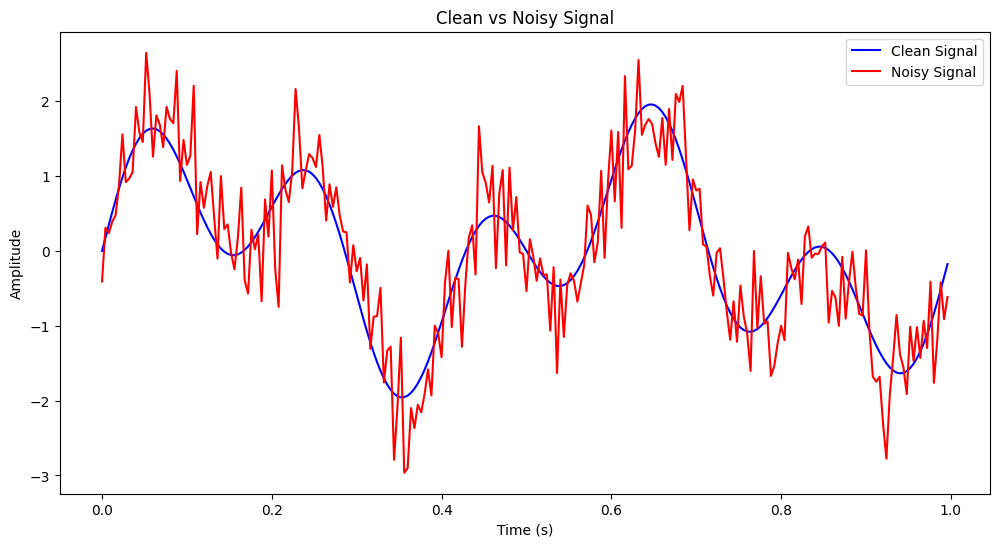

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_signal(f1, f2, fs, duration):
    t = np.arange(0, duration, 1/fs)
    clean = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    return t, clean

def add_noise(sig, sigma):
    noise = np.random.normal(0, sigma, sig.shape)
    return sig + noise    

def bandpass_fft(sig, fs, low, high):
    n = len(sig)
    freqs = np.fft.fftfreq(n, 1/fs)
    fft_sig = np.fft.fft(sig)

    filter_mask = (freqs >= low) & (freqs <= high) | (freqs >= -high) & (freqs <= -low)
    filtered_fft = fft_sig * filter_mask
    
    filtered_sig = np.fft.ifft(filtered_fft)
    
    return filtered_sig.real

def compute_snr(clean, test):
    noise = test - clean
    snr = 10 * np.log10(np.sum(clean**2) / np.sum(noise**2))
    return snr

# parameters
f1, f2    = 2, 5       # Hz
fs        = 50 * f2       # sampling rate
duration  = 1            # seconds
sigma     = 0.5            # noise std

# generate & noise
t, clean = generate_signal(f1, f2, fs, duration)
noisy     = add_noise(clean, sigma)

# plot clean vs noisy
plt.figure(figsize=(12, 6))
plt.plot(t, clean, label='Clean Signal', color='blue')
plt.plot(t, noisy, label='Noisy Signal', color='red')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Clean vs Noisy Signal')
plt.show()


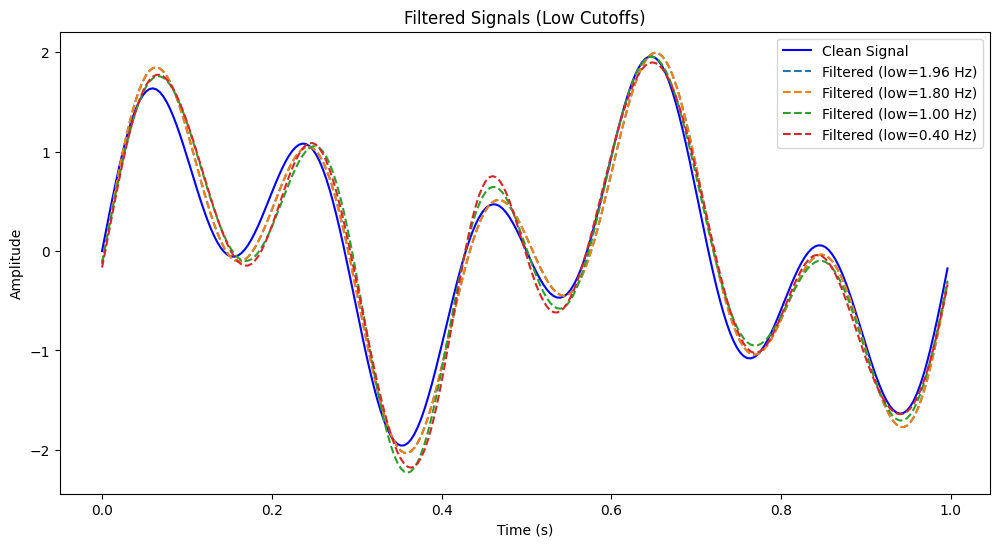

SNR Impact Matrix:
             High 5.10 Hz  High 5.50 Hz  High 7.50 Hz  High 10.00 Hz
Low 1.96 Hz     17.041118     17.041118     15.085671      14.671333
Low 1.80 Hz     17.041118     17.041118     15.085671      14.671333
Low 1.00 Hz     15.843227     15.843227     14.284932      13.937650
Low 0.40 Hz     15.843227     15.843227     14.284932      13.937650


In [2]:
# Define cutoffs (Hz)
low_cuts  = 0.98 * f1, 0.9 * f1, 0.5 * f1,0.2 * f1
high_cuts = 1.02 * f2, 1.1 * f2, 1.5 * f2, 2 * f2

# 4) filter & collect
filtered = []
snr_vals = np.zeros((len(low_cuts), len(high_cuts)))

for i, low in enumerate(low_cuts):
    for j, high in enumerate(high_cuts):
        sig_f = bandpass_fft(noisy, fs, low, high)
        filtered.append(sig_f)
        snr_vals[i,j] = compute_snr(clean, sig_f)

# plot: clean and all filtered (first low only for clarity)
plt.figure(figsize=(12, 6))
plt.plot(t, clean, label='Clean Signal', color='blue')
for i, low in enumerate(low_cuts):
    plt.plot(t, filtered[i], label=f'Filtered (low={low:.2f} Hz)', linestyle='--')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signals (Low Cutoffs)')
plt.show()

# SNR impact matrix
snr_df = pd.DataFrame(snr_vals, index=[f'Low {low:.2f} Hz' for low in low_cuts],
                      columns=[f'High {high:.2f} Hz' for high in high_cuts])
print("SNR Impact Matrix:")
print(snr_df)

# 2. 2D Fourier Transform




The 2D Fourier Transform is an extension of the 1D Fourier Transform used to analyze two-dimensional signals, such as images. It transforms a spatial-domain signal (like an image) into the frequency domain.

**What It Does:**

It breaks down an image into its sinusoidal frequency components—telling us how much of each frequency is present and where.

**Mathematical Definition:**

For a continuous 2D function
$f(x,y)$, the 2D Fourier Transform is:

$$
F(u,v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, e^{-j 2 \pi (u x + v y)} \, dx \, dy
$$

$f(x,y)$ : the original image or spatial-domain signal

$F(u,v)$ : the frequency-domain representation

$u,v$ : frequency coordinates

In digital image processing, we usually use the **Discrete Fourier Transform** (DFT), computed using the **Fast Fourier Transform** (FFT) algorithm for efficiency.

**Why It's Useful:**

- It helps analyze the frequency content of images.

- It's widely used in image filtering, compression, and reconstruction.

- High-frequency components correspond to edges and fine details.

- Low-frequency components represent smooth areas and background.

**Inverse 2D Fourier Transform:**

To return to the original image from its frequency domain, we use the inverse transform:

$$
f(x,y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} F(u,,v) \, e^{j 2 \pi (u x + v y)} \, du \, dv
$$

-------------------------------------------------------
##2.1)
Create three separate 256×256 grayscale images, each containing one of the following shapes centered on a black background:

**a square, a triangle, and a circle**

For each image:

- Apply a vertical shift and a horizontal shift to simulate motion in both directions.

- Compute the 2D Fourier Transform (FFT2) of the original image, the vertically shifted image, and the horizontally shifted image.

- Visualize the magnitude spectrum of each FFT.

- Compute and display the difference in magnitude between the original and each shifted image in the frequency domain.

**Analyze how motion (horizontal vs vertical) affects the frequency domain and whether the direction of movement can be inferred from changes in the FFT.**

------

Answer :

-------

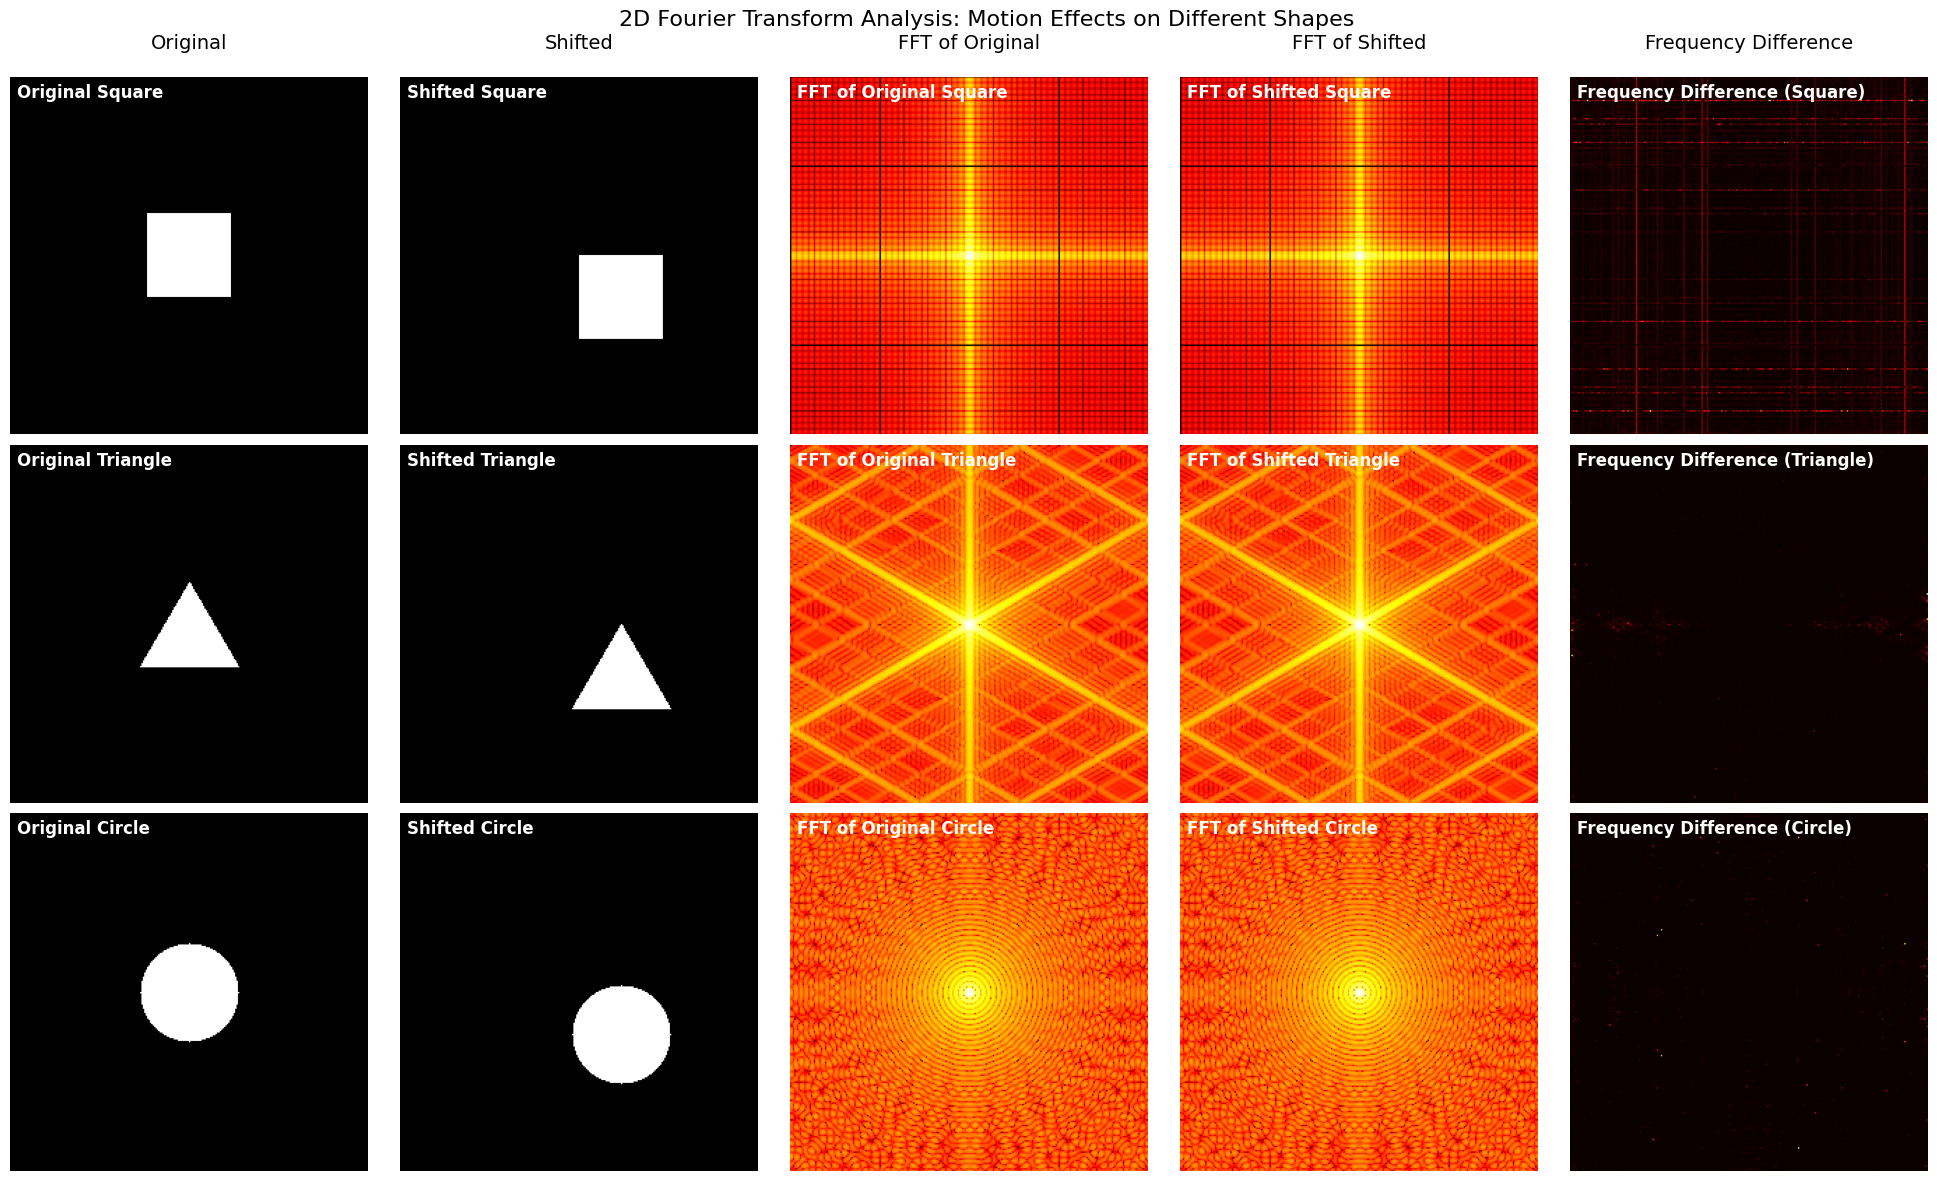

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define 2D FFT function
def compute_fft2(image):
    """Compute 2D FFT and return shifted magnitude spectrum"""
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)
    magnitude = np.abs(fft_shifted)
    # Use log scaling for better visualization
    magnitude_log = np.log(magnitude + 1)
    return fft_shifted, magnitude_log

# Create a black image of size 256x256
image_size = 256

# Square
square_img = np.zeros((image_size, image_size), dtype=np.uint8)
center = image_size // 2
square_size = 60
half_sq = square_size // 2
square_img[center-half_sq:center+half_sq, center-half_sq:center+half_sq] = 255

# Triangle
triangle_img = np.zeros((image_size, image_size), dtype=np.uint8)
triangle_size = 70
height = int(triangle_size * np.sqrt(3) / 2)
vertices = np.array([
    [center, center - height//2],      # top
    [center - triangle_size//2, center + height//2],  # bottom left
    [center + triangle_size//2, center + height//2]   # bottom right
], dtype=np.int32)
cv2.fillPoly(triangle_img, [vertices], 255)

# Circle
circle_img = np.zeros((image_size, image_size), dtype=np.uint8)
radius = 35
cv2.circle(circle_img, (center, center), radius, 255, -1)

# Apply shifts (simulate motion) for all shapes
shift_amount = 30
# Create transformation matrix for diagonal shift (both horizontal and vertical)
M = np.float32([[1, 0, shift_amount], [0, 1, shift_amount]])

shifted_img_square = cv2.warpAffine(square_img, M, (image_size, image_size))
shifted_img_triangle = cv2.warpAffine(triangle_img, M, (image_size, image_size))
shifted_img_circle = cv2.warpAffine(circle_img, M, (image_size, image_size))

# Compute 2D FFTs
fft_img_square, mag_square = compute_fft2(square_img)
fft_shifted_img_square, mag_shifted_square = compute_fft2(shifted_img_square)

fft_img_triangle, mag_triangle = compute_fft2(triangle_img)
fft_shifted_img_triangle, mag_shifted_triangle = compute_fft2(shifted_img_triangle)

fft_img_circle, mag_circle = compute_fft2(circle_img)
fft_shifted_img_circle, mag_shifted_circle = compute_fft2(shifted_img_circle)

# Compute the frequency difference magnitude for all shapes
fft_diff_square = np.abs(mag_shifted_square - mag_square)
fft_diff_triangle = np.abs(mag_shifted_triangle - mag_triangle)
fft_diff_circle = np.abs(mag_shifted_circle - mag_circle)

# Create the exact layout as shown in the image
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle('2D Fourier Transform Analysis: Motion Effects on Different Shapes', fontsize=16)

# Define titles for columns
col_titles = ['Original', 'Shifted', 'FFT of Original', 'FFT of Shifted', 'Frequency Difference']
for i, title in enumerate(col_titles):
    axes[0, i].set_title(title, fontsize=14, pad=20)

# Row 1: Square
axes[0, 0].imshow(square_img, cmap='gray')
axes[0, 0].text(0.02, 0.98, 'Original Square', transform=axes[0, 0].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(shifted_img_square, cmap='gray')
axes[0, 1].text(0.02, 0.98, 'Shifted Square', transform=axes[0, 1].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(mag_square, cmap='hot')
axes[0, 2].text(0.02, 0.98, 'FFT of Original Square', transform=axes[0, 2].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[0, 2].axis('off')

axes[0, 3].imshow(mag_shifted_square, cmap='hot')
axes[0, 3].text(0.02, 0.98, 'FFT of Shifted Square', transform=axes[0, 3].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[0, 3].axis('off')

axes[0, 4].imshow(fft_diff_square, cmap='hot')
axes[0, 4].text(0.02, 0.98, 'Frequency Difference (Square)', transform=axes[0, 4].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[0, 4].axis('off')

# Row 2: Triangle
axes[1, 0].imshow(triangle_img, cmap='gray')
axes[1, 0].text(0.02, 0.98, 'Original Triangle', transform=axes[1, 0].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(shifted_img_triangle, cmap='gray')
axes[1, 1].text(0.02, 0.98, 'Shifted Triangle', transform=axes[1, 1].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(mag_triangle, cmap='hot')
axes[1, 2].text(0.02, 0.98, 'FFT of Original Triangle', transform=axes[1, 2].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[1, 2].axis('off')

axes[1, 3].imshow(mag_shifted_triangle, cmap='hot')
axes[1, 3].text(0.02, 0.98, 'FFT of Shifted Triangle', transform=axes[1, 3].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[1, 3].axis('off')

axes[1, 4].imshow(fft_diff_triangle, cmap='hot')
axes[1, 4].text(0.02, 0.98, 'Frequency Difference (Triangle)', transform=axes[1, 4].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[1, 4].axis('off')

# Row 3: Circle
axes[2, 0].imshow(circle_img, cmap='gray')
axes[2, 0].text(0.02, 0.98, 'Original Circle', transform=axes[2, 0].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[2, 0].axis('off')

axes[2, 1].imshow(shifted_img_circle, cmap='gray')
axes[2, 1].text(0.02, 0.98, 'Shifted Circle', transform=axes[2, 1].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[2, 1].axis('off')

axes[2, 2].imshow(mag_circle, cmap='hot')
axes[2, 2].text(0.02, 0.98, 'FFT of Original Circle', transform=axes[2, 2].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[2, 2].axis('off')

axes[2, 3].imshow(mag_shifted_circle, cmap='hot')
axes[2, 3].text(0.02, 0.98, 'FFT of Shifted Circle', transform=axes[2, 3].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[2, 3].axis('off')

axes[2, 4].imshow(fft_diff_circle, cmap='hot')
axes[2, 4].text(0.02, 0.98, 'Frequency Difference (Circle)', transform=axes[2, 4].transAxes, 
                fontsize=12, verticalalignment='top', color='white', weight='bold')
axes[2, 4].axis('off')

plt.tight_layout()
plt.show()



##2.2) Hybrid Image :
A hybrid image is an image that combines **low-frequency** content from one image with **high-frequency** content from another. The purpose of creating a hybrid image is to visually merge two different images in a way that reveals different characteristics at different scales. When viewed from a distance, the low-frequency (blurred) image becomes dominant, while up close, the high-frequency (detailed) content takes over. This effect is achieved by filtering the images in the frequency domain and then combining them.

- **Low-pass filter** : This filter allows low frequencies (smooth, blurred components) to pass through while attenuating the high frequencies (details and edges).

- **High-pass filter**: This filter allows high frequencies (edges, details) to pass through while attenuating the low frequencies (smooth, blurred components).

For better understanding, you can refer to the following link.

https://cs.brown.edu/courses/cs143/2011/results/proj1/edwallac/

---

Implement a hybrid image using the 2D Fourier Transform and Gaussian filters. The goal is to combine the low-frequency components of one image with the high-frequency components of another image, creating a hybrid image that shows different details depending on the viewing distance.

1. Image Preparation:

You will work with two images: one for the low-frequency part and one for the high-frequency part.

These images will be processed in the frequency domain using the 2D Fourier Transform.

2. Frequency Filtering:

For the low-frequency part: Apply a low-pass Gaussian filter to the first image (img1). The filter's sigma value determines the cutoff of the low frequencies.

For the high-frequency part: Apply a high-pass Gaussian filter to the second image (img2). The high-pass filter is obtained by subtracting the low-pass filter from 1.

3. Creating the Hybrid Image:

Compute the 2D FFT of both images.

Apply the appropriate filters to the frequency domain versions of the images.

Use the inverse 2D FFT to convert the filtered frequency domain images back to the spatial domain.

Combine the low-frequency and high-frequency components to create the hybrid image.

4. Visualization:

For different values of sigma_low and sigma_high, display the following for each case:

The low-frequency component.

The high-frequency component.

The hybrid image (combination of both).

5. Exploration:

Vary the values of sigma_low and sigma_high to see how the hybrid image changes.

Observe how the hybrid image behaves differently depending on the viewing distance: at a distance, the low frequencies dominate, and up close, the high frequencies are more visible.


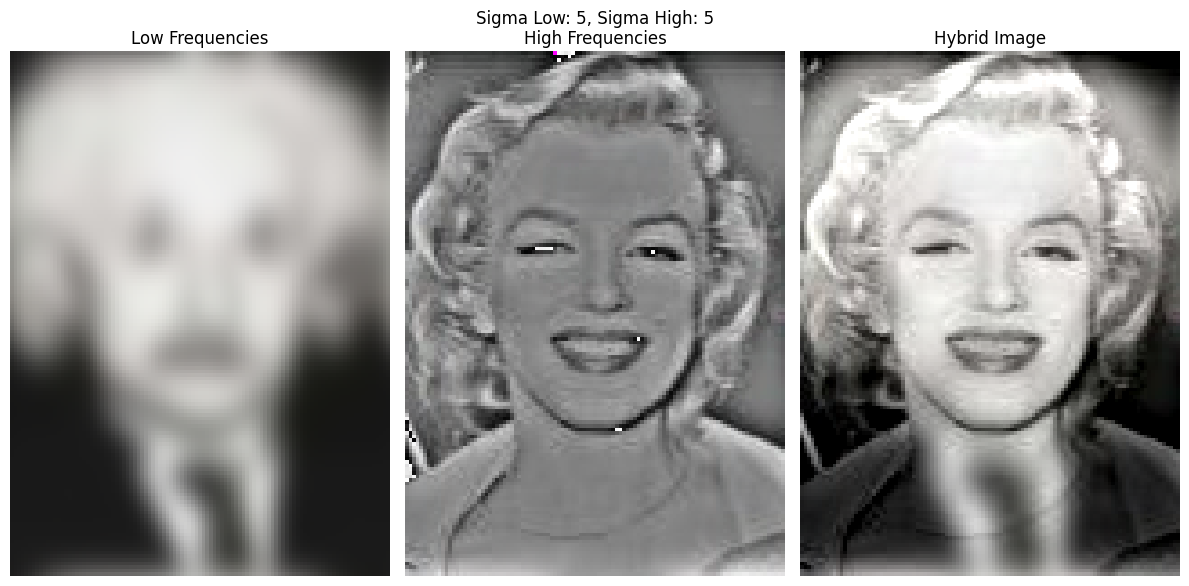

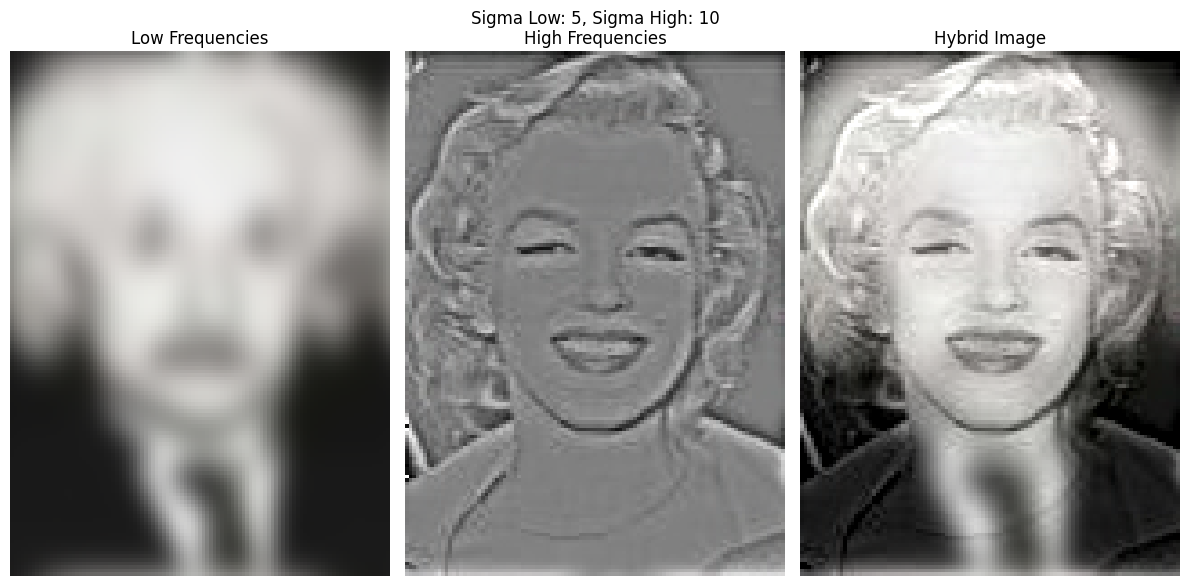

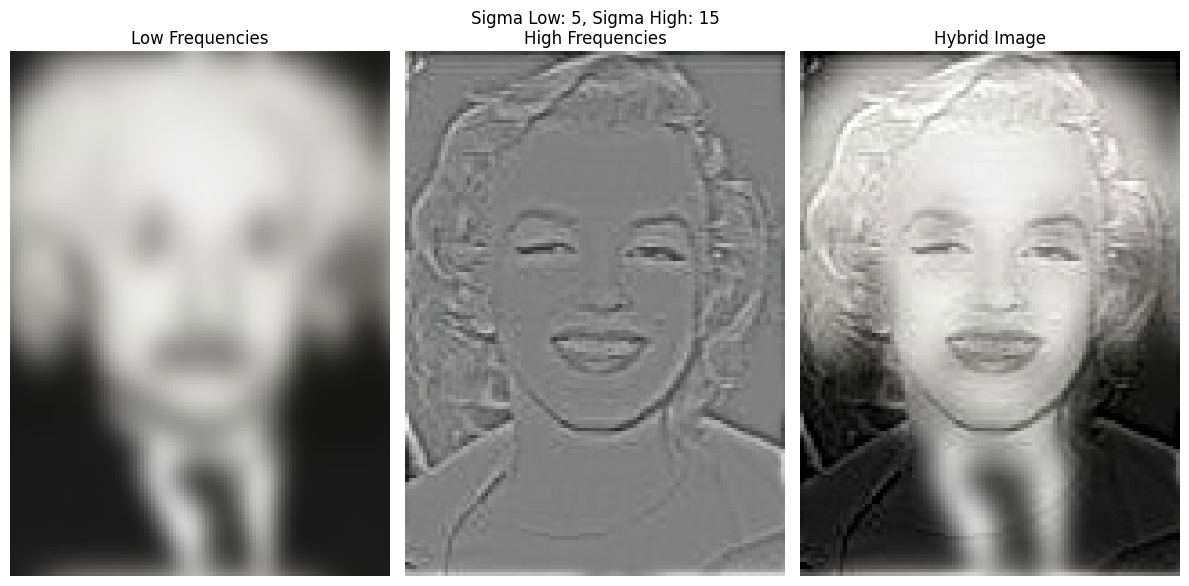

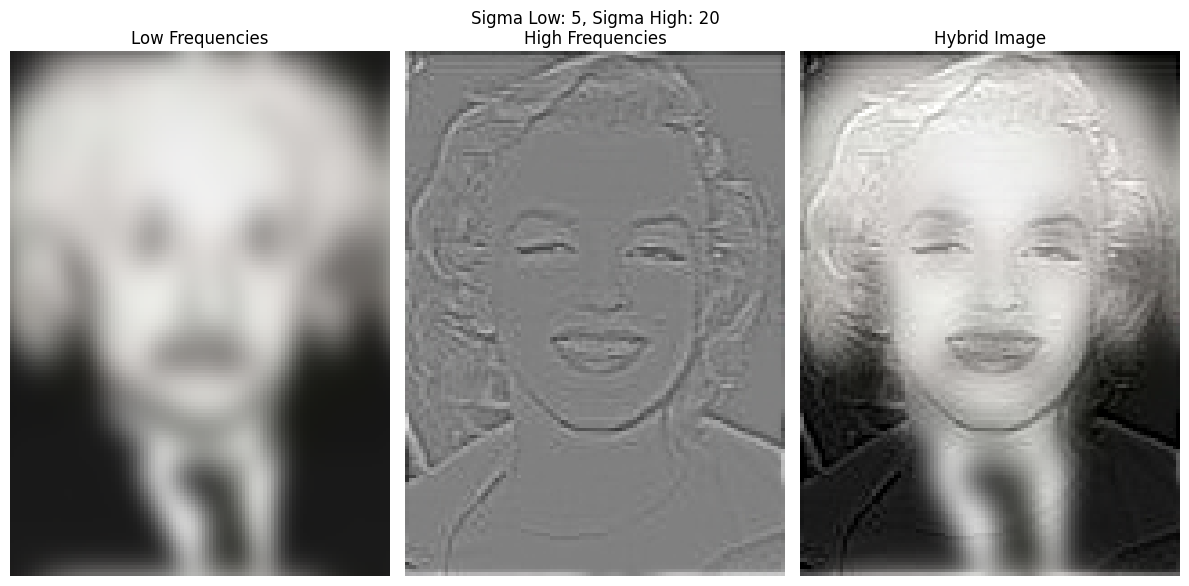

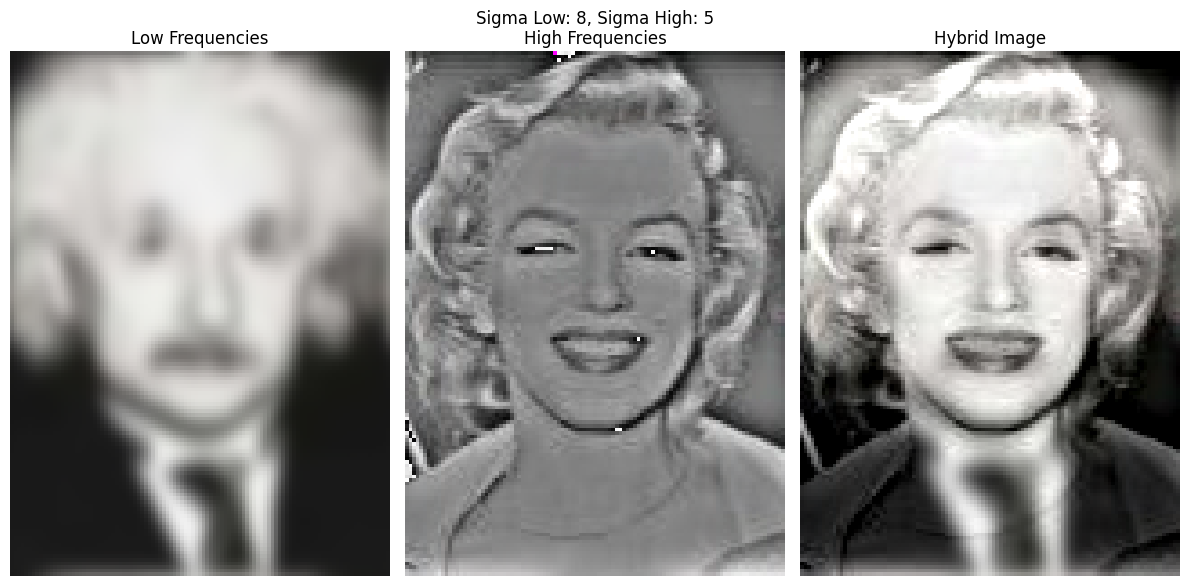

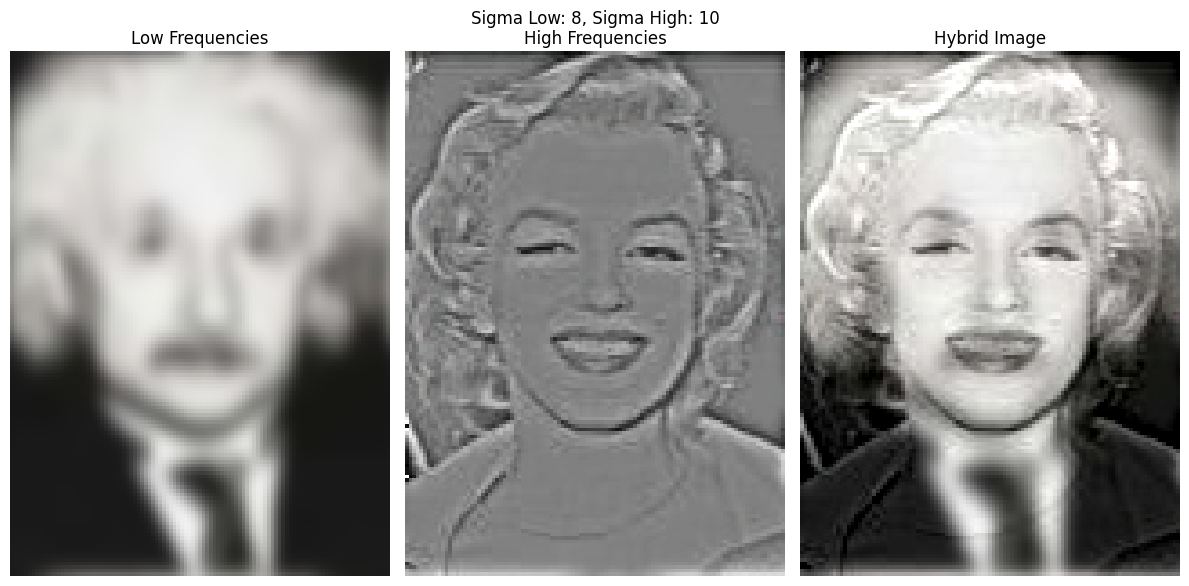

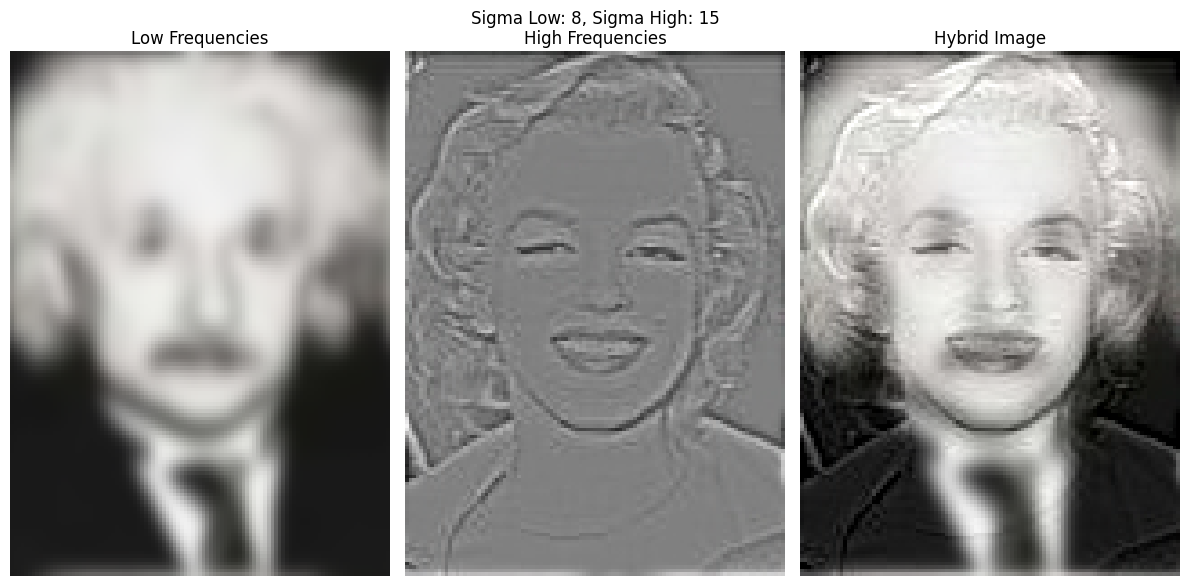

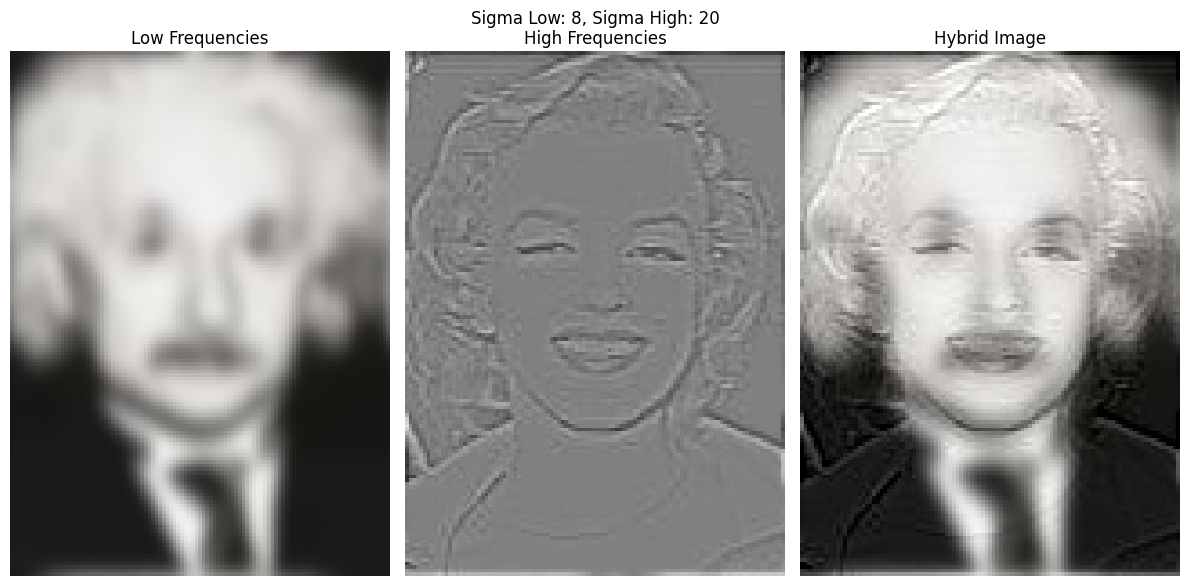

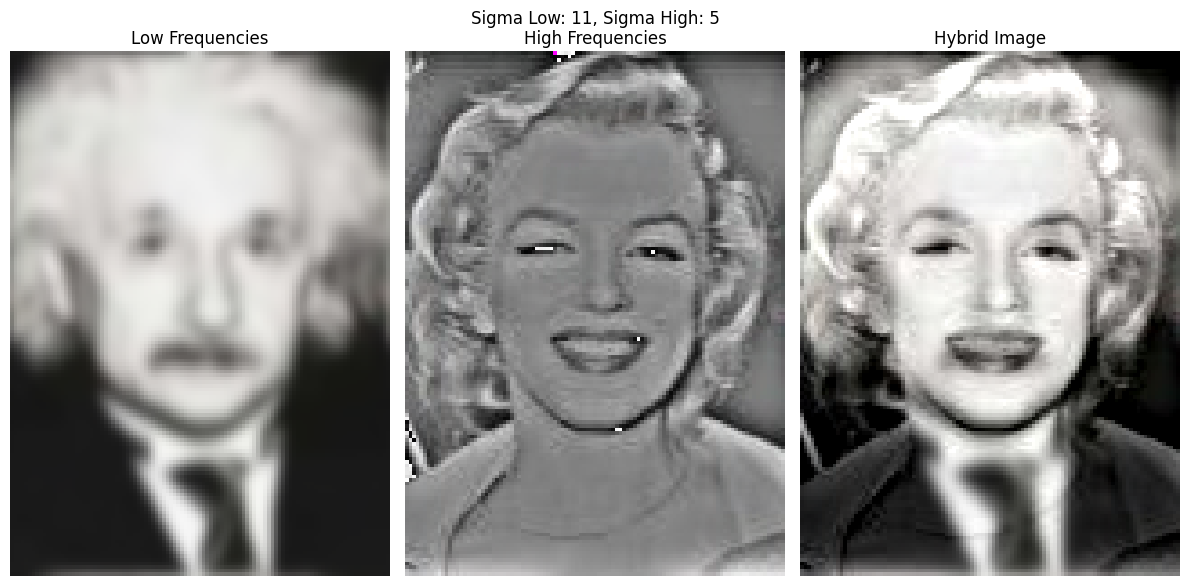

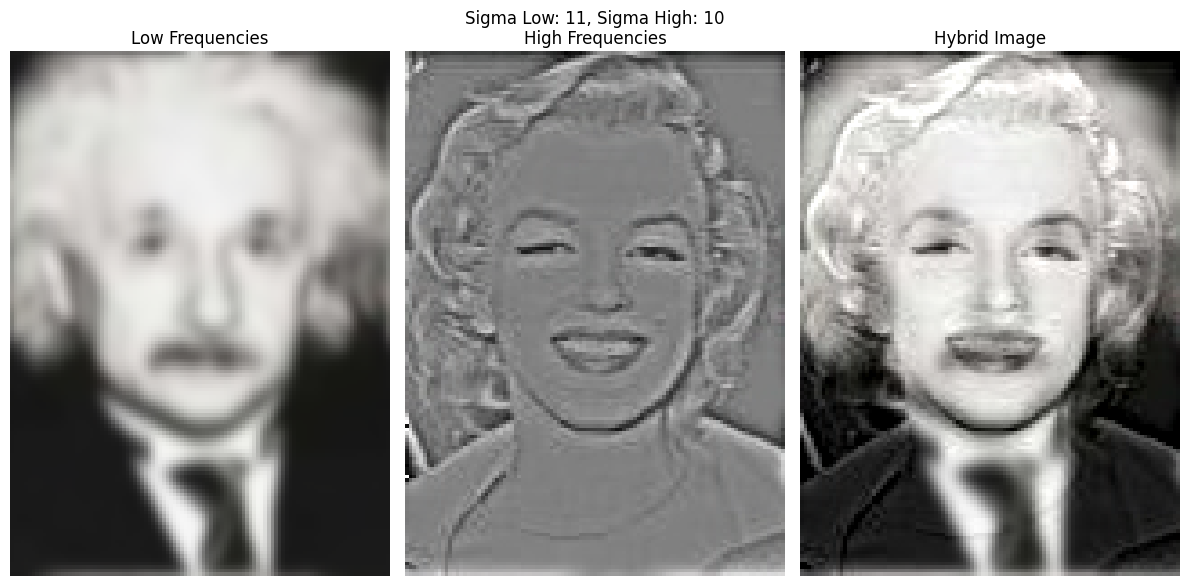

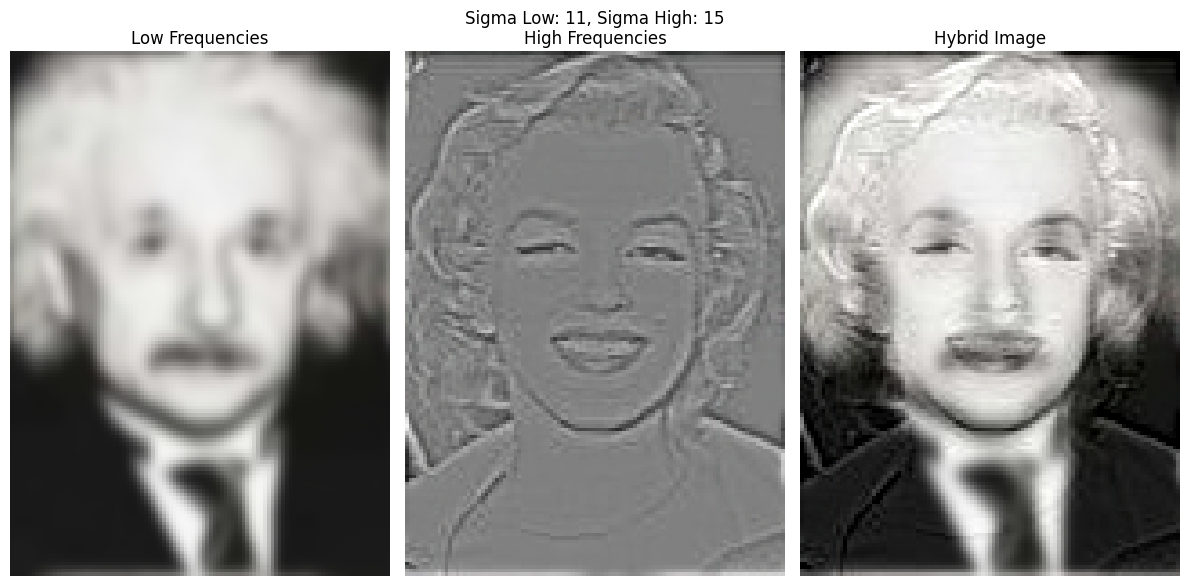

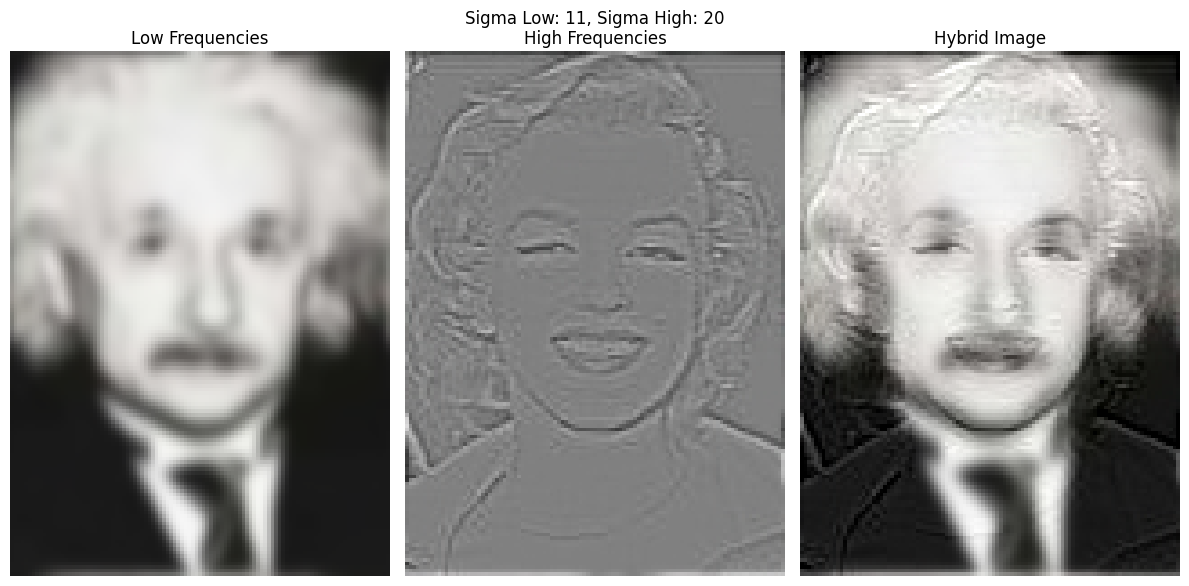

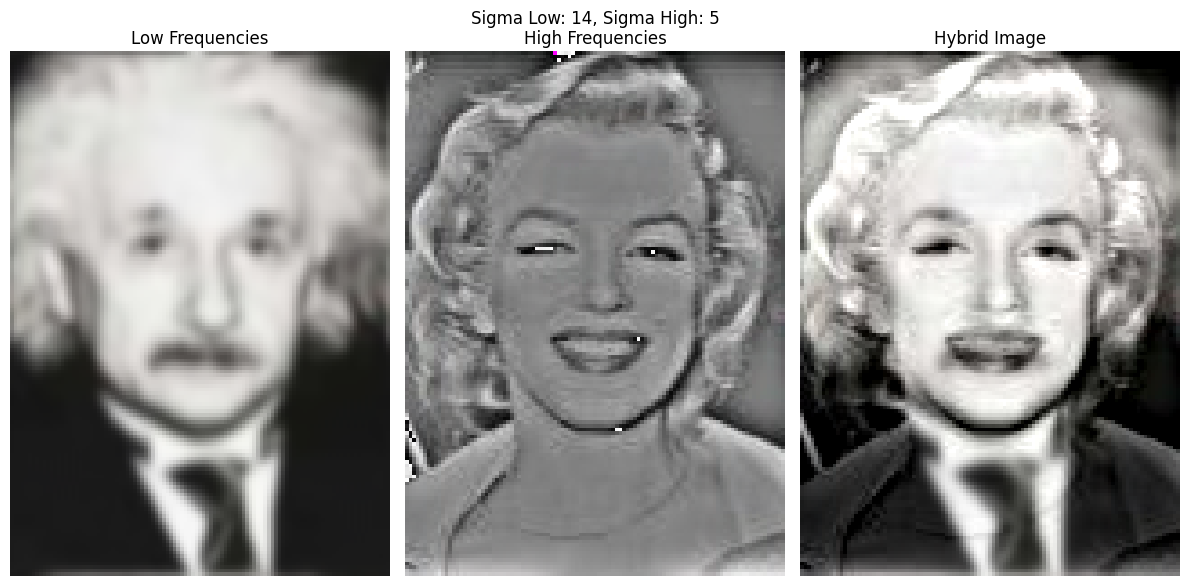

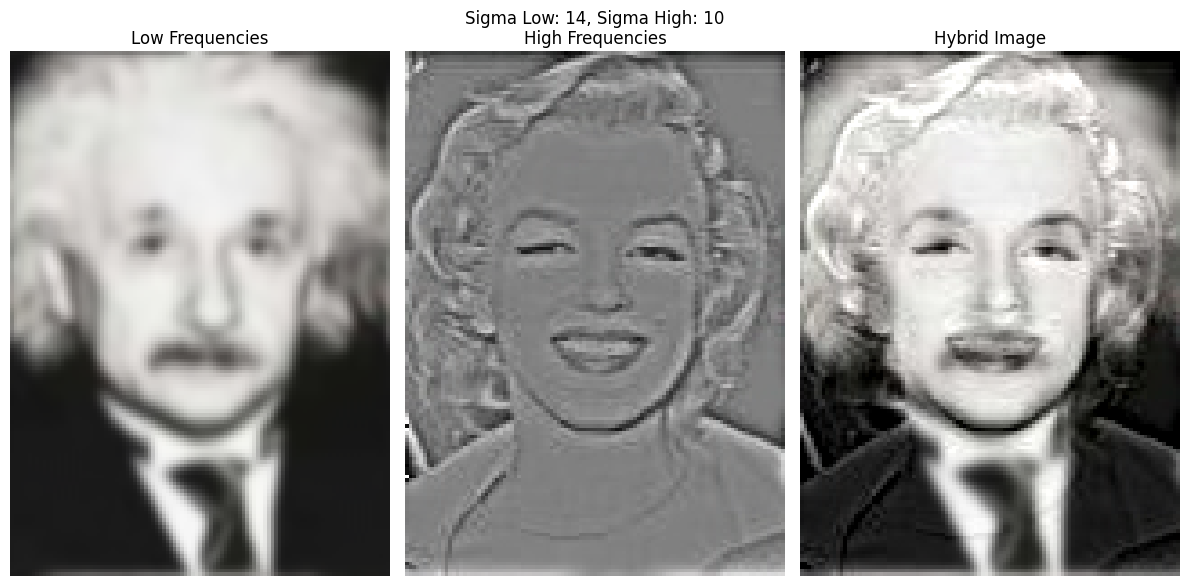

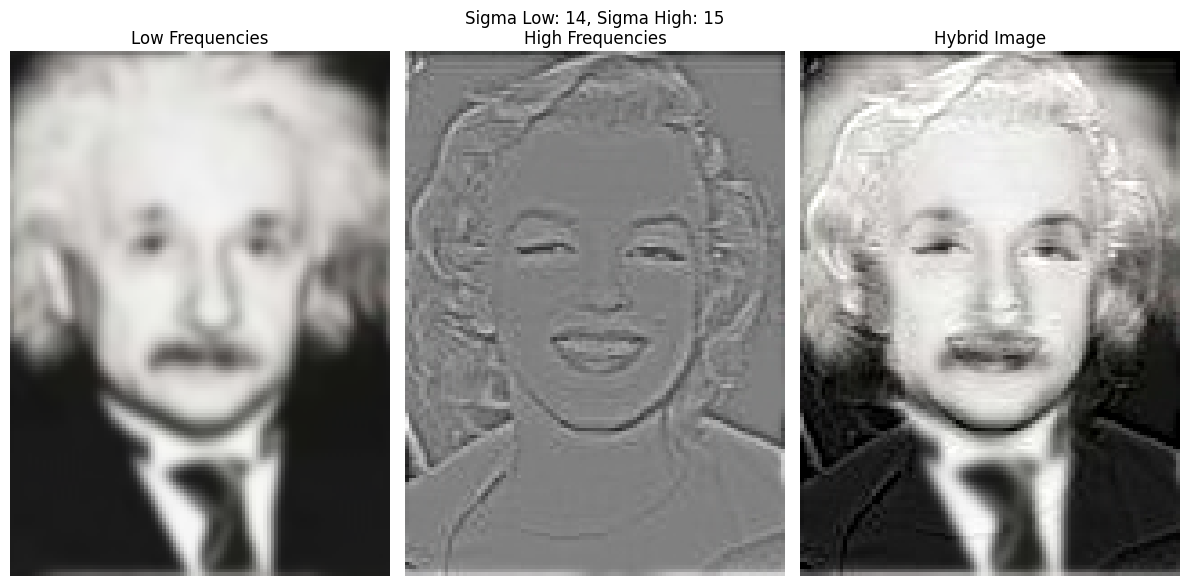

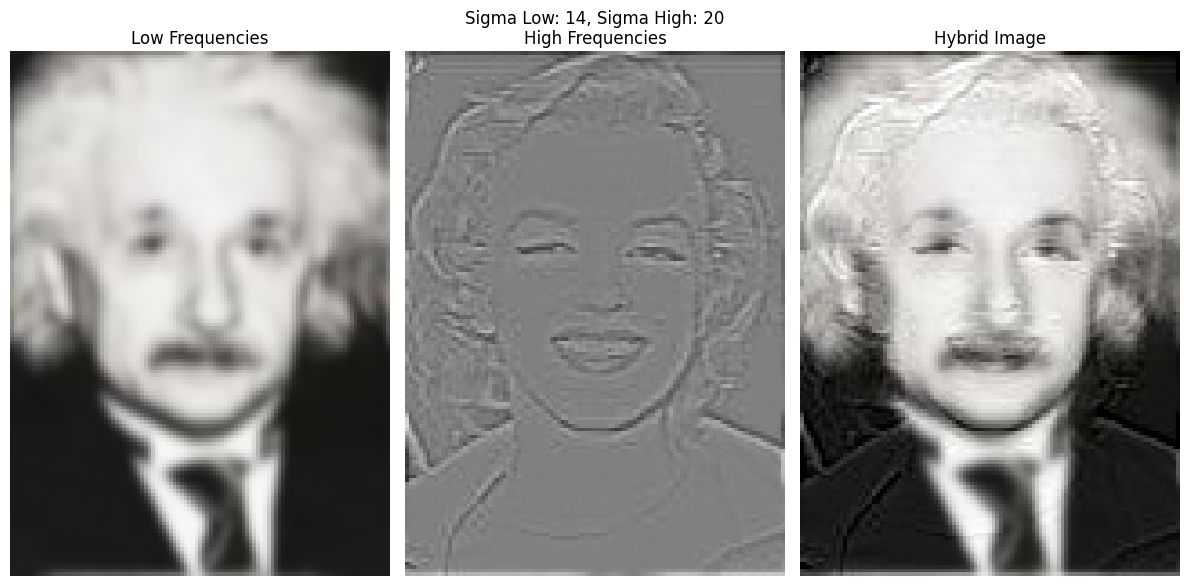

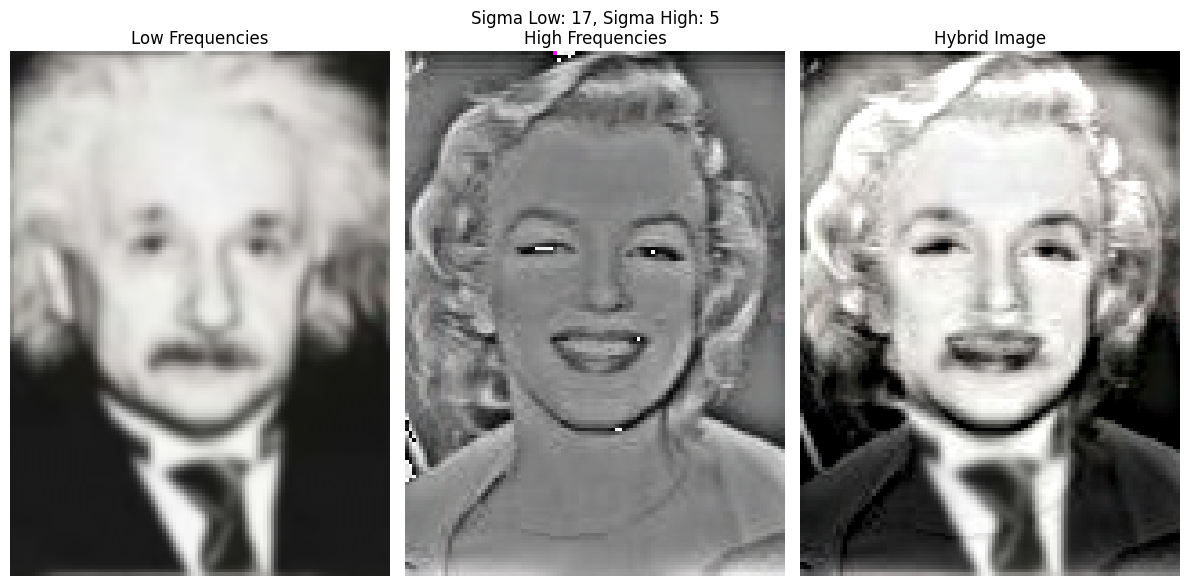

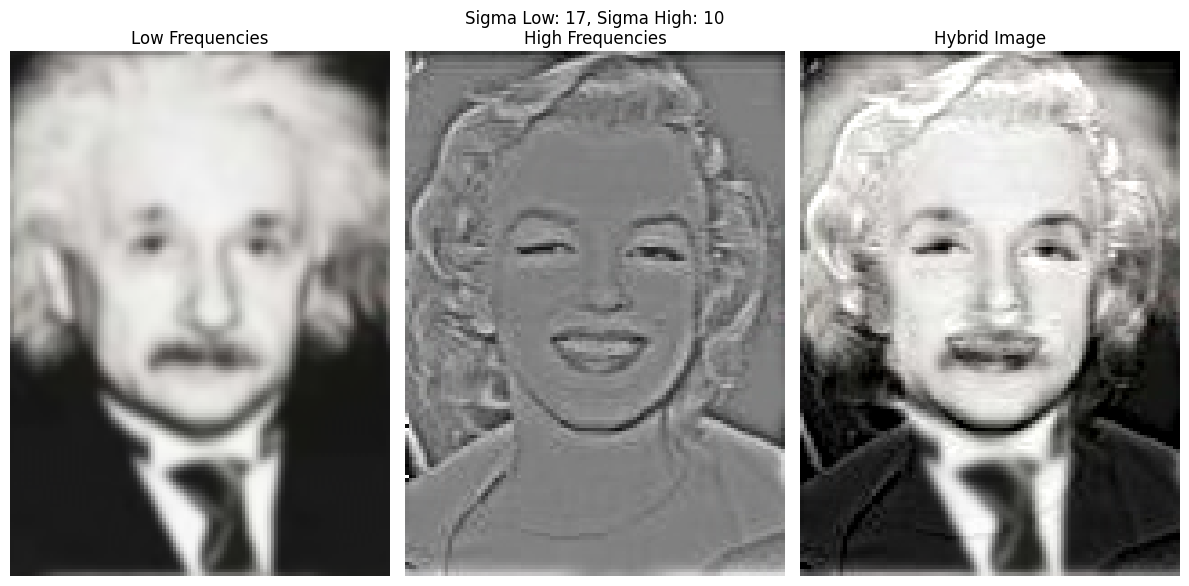

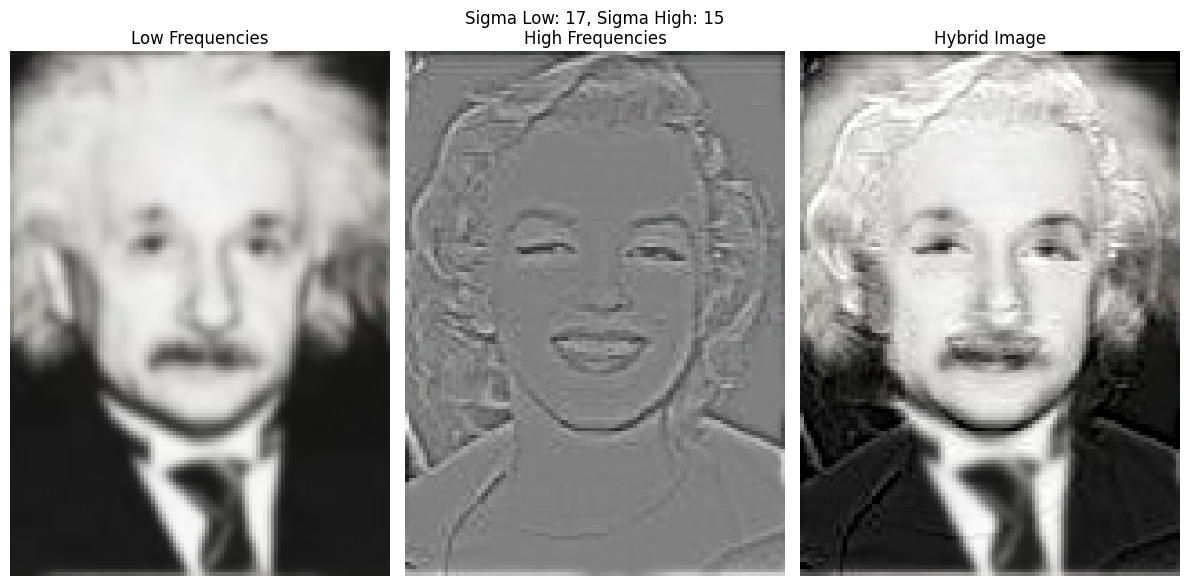

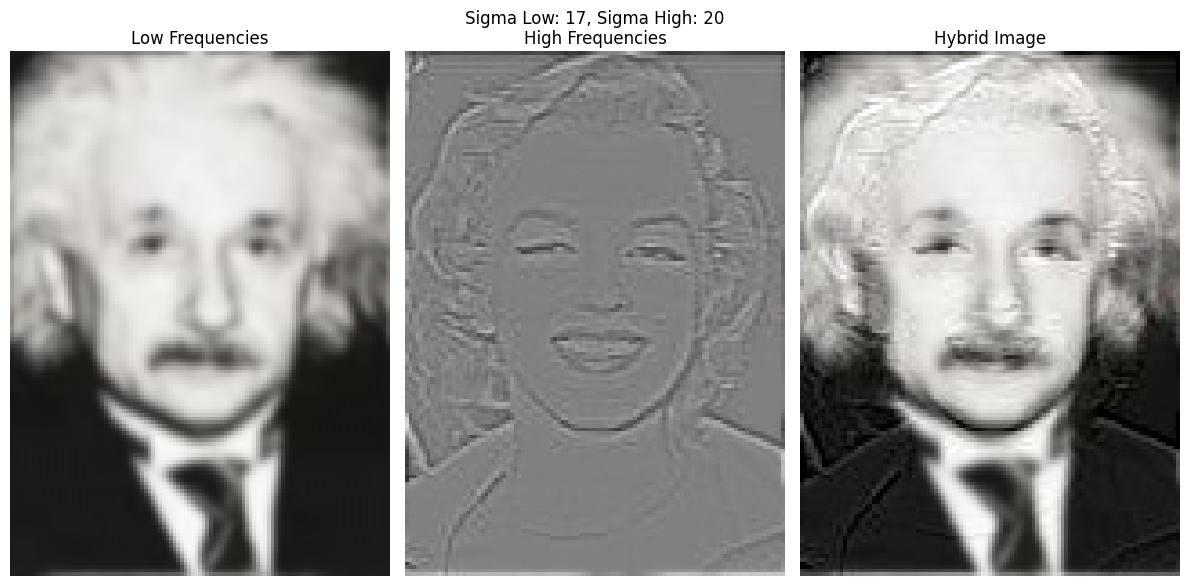

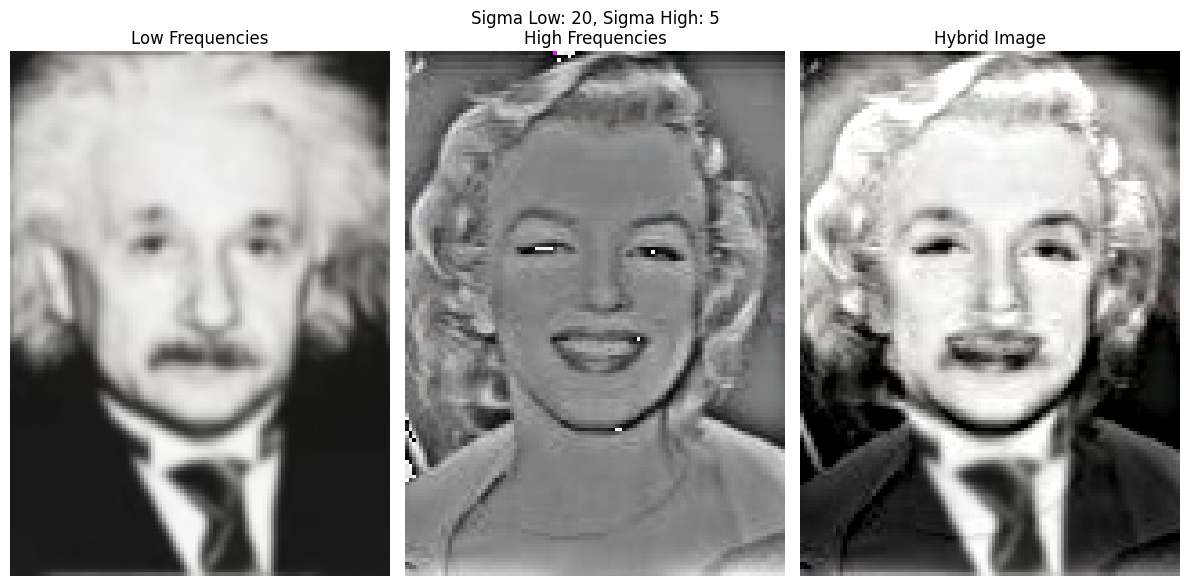

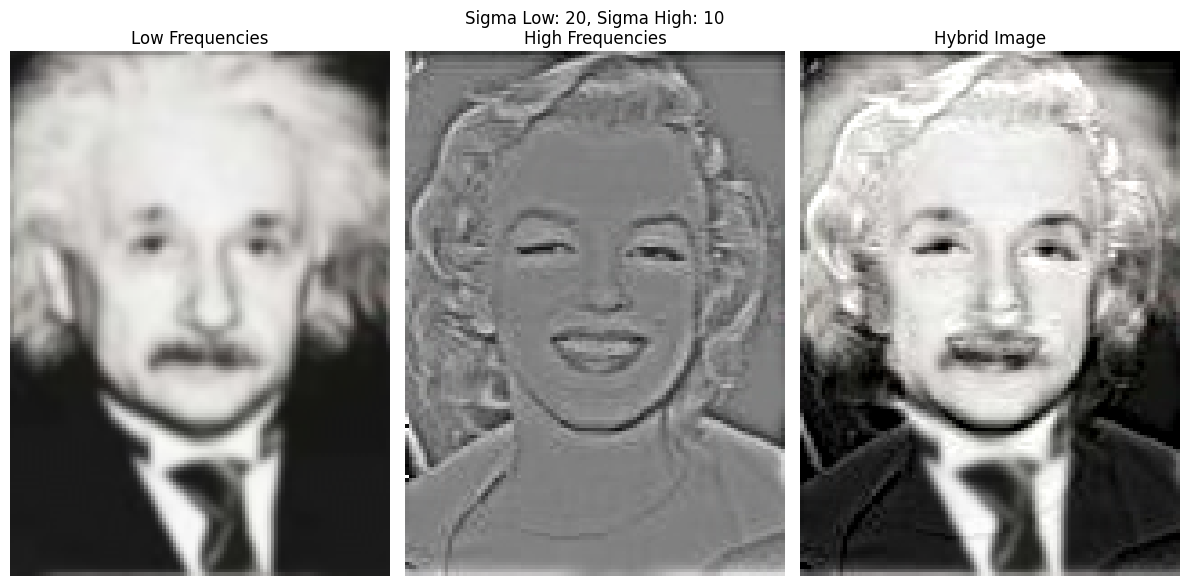

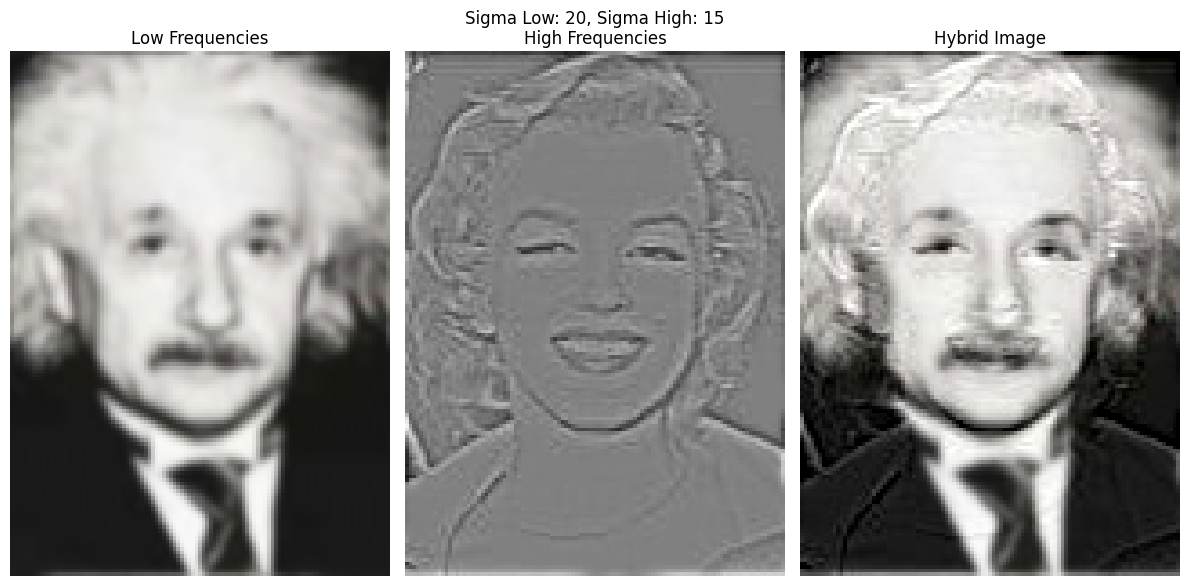

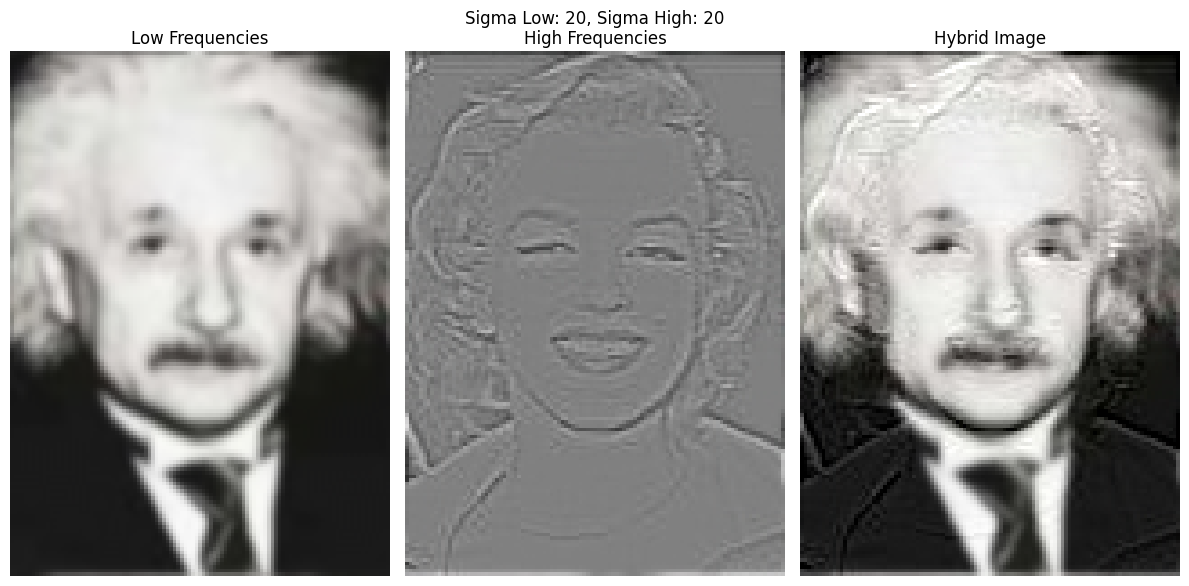

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fft2d(img_channel):
    """Compute 2D FFT and shift center for a single channel"""
    # Compute 2D FFT
    fft = np.fft.fft2(img_channel)
    # Shift zero frequency to center
    fft_shifted = np.fft.fftshift(fft)
    return fft_shifted

def ifft2d(freq_channel):
    """Compute inverse 2D FFT for a single channel"""
    # Shift back from center
    freq_shifted = np.fft.ifftshift(freq_channel)
    # Compute inverse FFT
    img = np.fft.ifft2(freq_shifted)
    return img

def create_gaussian_filter(shape, sigma, highpass=False):
    """Create Gaussian filter in frequency domain"""
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create coordinate matrices
    u = np.arange(rows).reshape(-1, 1) - center_row
    v = np.arange(cols).reshape(1, -1) - center_col
    
    # Calculate distance from center
    D = np.sqrt(u**2 + v**2)
    
    # Create Gaussian filter
    gaussian_filter = np.exp(-(D**2) / (2 * sigma**2))
    
    if highpass:
        # High-pass filter = 1 - low-pass filter
        gaussian_filter = 1 - gaussian_filter
    
    return gaussian_filter

def create_hybrid_fft(img1, img2, sigma_low, sigma_high):
    """Create hybrid image using FFT"""
    img1 = img1.astype(np.float32) / 255.0
    img2 = img2.astype(np.float32) / 255.0

    low_frequencies = np.zeros_like(img1)
    high_frequencies = np.zeros_like(img2)

    # Process each color channel
    for c in range(3):
        # Compute FFT
        img1_fft = fft2d(img1[:, :, c])
        img2_fft = fft2d(img2[:, :, c])

        # Create frequency masks
        low_pass_filter = create_gaussian_filter(img1.shape[:2], sigma_low, highpass=False)
        high_pass_filter = create_gaussian_filter(img2.shape[:2], sigma_high, highpass=True)

        # Apply filters
        low_freq_fft = img1_fft * low_pass_filter
        high_freq_fft = img2_fft * high_pass_filter

        # Compute inverse FFT
        low_freq = np.real(ifft2d(low_freq_fft))
        high_freq = np.real(ifft2d(high_freq_fft))

        low_frequencies[:, :, c] = low_freq
        high_frequencies[:, :, c] = high_freq

    # Combine frequencies
    hybrid = low_frequencies + high_frequencies
    hybrid = np.clip(hybrid, 0, 1)

    return (low_frequencies * 255).astype(np.uint8), (high_frequencies * 255).astype(np.uint8), (hybrid * 255).astype(np.uint8)

def sweep_sigma_fft(img1_path, img2_path):
    """Test different sigma values for hybrid image creation"""
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    # Convert to RGB
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

    # Test different sigma values
    for sigma_low in range(5, 21, 3):
        for sigma_high in range(5, 21, 5):
            low_freq, high_freq, hybrid = create_hybrid_fft(img1, img2, sigma_low, sigma_high)

            plt.figure(figsize=(12, 6))
            plt.suptitle(f'Sigma Low: {sigma_low}, Sigma High: {sigma_high}')

            plt.subplot(1, 3, 1)
            plt.imshow(np.clip(low_freq, 0, 255).astype(np.uint8))
            plt.title('Low Frequencies')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(np.clip(high_freq + 128, 0, 255).astype(np.uint8))
            plt.title('High Frequencies')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(np.clip(hybrid, 0, 255).astype(np.uint8))
            plt.title('Hybrid Image')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

# Image paths
img1_path = 'i1.jpg'  # Image for low frequencies
img2_path = 'i2.jpg'  # Image for high frequencies

sweep_sigma_fft(img1_path, img2_path)

# 3. SIFT Feature Extraction and Matching


In this section of the assignment, you’ll work with the SIFT (Scale-Invariant Feature Transform) algorithm to find and match features between images. SIFT is a popular method for detecting interesting points in an image (like corners, edges, and blobs) and describing them in a way that stays consistent even if the image is rotated, scaled, or slightly changed.

You will do two main things:
1. **Extract Features and Descriptors:** Run SIFT on images to find keypoints and generate their descriptors. Keypoints mark important spots in the image, and descriptors describe the region around each keypoint.
2. **Match Features Between Images:** Once you have descriptors from two images, you’ll match them to find points that likely correspond to the same part of the scene.


## How SIFT Works


### 1. Scale-Space Construction and Octaves

To detect features at different scales, SIFT builds a **scale-space**.  
The scale-space of an image $ I(x,y) $ is defined as:

$$
L(x,y,\sigma) = G(x,y,\sigma) * I(x,y)
$$

where:
- $ * $ is convolution,
- $ G(x,y,\sigma) $ is a Gaussian function with standard deviation $ \sigma $:
  
$$
G(x,y,\sigma) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$

Instead of directly using the Gaussian blurred images, SIFT works with the **Difference of Gaussians (DoG)**, which approximates the Laplacian of Gaussian (LoG):

$$
D(x,y,\sigma) = L(x,y,k\sigma) - L(x,y,\sigma)
$$

where $ k $ is a constant scale multiplier.

The images are grouped into **octaves**.  
Each octave contains a set of blurred images at increasing scales, and after each octave, the image is **downsampled by a factor of 2** to start a new octave.  
This way, features are captured efficiently over a wide range of sizes.

Here is a visual demonstration:

<p align="center">
  <img src="https://docs.opencv.org/4.x/sift_dog.jpg" width="400"/>
</p>

<br>
<br>

### 2. Keypoint Detection (Finding Extrema)

SIFT detects keypoints by finding local extrema in the DoG images.  
Each pixel is compared to its 26 neighbors (8 in the current scale, 9 above, and 9 below).  
A pixel is selected as a keypoint if it is a maximum or minimum among all these neighbors.

<br>
<br>

### 3. Keypoint Localization (Refining the Keypoints)

Once a candidate keypoint is found, its exact position and scale are refined.  
A Taylor series expansion of the DoG function around the candidate point is used:

$$
D(\mathbf{x}) = D + \frac{\partial D}{\partial \mathbf{x}}^T \mathbf{x} + \frac{1}{2} \mathbf{x}^T \frac{\partial^2 D}{\partial \mathbf{x}^2} \mathbf{x}
$$

where $ \mathbf{x} = (x, y, \sigma) $ is the offset from the candidate point.

Keypoints with low contrast or those poorly localized along edges are discarded, using eigenvalues of the local Hessian matrix.

<br>
<br>

### 4. Orientation Assignment

Each keypoint is assigned one or more dominant orientations based on the image gradients in its neighborhood.  
The gradient magnitude and direction are computed as:

$$
m(x,y) = \sqrt{(L(x+1,y) - L(x-1,y))^2 + (L(x,y+1) - L(x,y-1))^2}
$$
$$
\theta(x,y) = \arctan\left( \frac{L(x,y+1) - L(x,y-1)}{L(x+1,y) - L(x-1,y)} \right)
$$

An orientation histogram (typically 36 bins over 360°) is created, and the highest peak (or multiple peaks) defines the keypoint orientation(s).

<br>
<br>

### 5. Descriptor Generation

Around each keypoint, SIFT computes a descriptor that is robust to lighting and viewpoint changes:
- The neighborhood is divided into a \( 4 \times 4 \) grid.
- In each grid cell, an 8-bin orientation histogram is created.
- This results in a 128-dimensional descriptor:

$$
4 \times 4 \times 8 = 128
$$

The descriptor is normalized to unit length to reduce the effects of illumination changes.

## Imports and Libraries

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Loading the images

First we load the images we want to work with.

In [6]:
# TODO: Load the images (gray scale)
img1 = cv.imread('img1.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2.png', cv.IMREAD_GRAYSCALE)

Now plot each image.

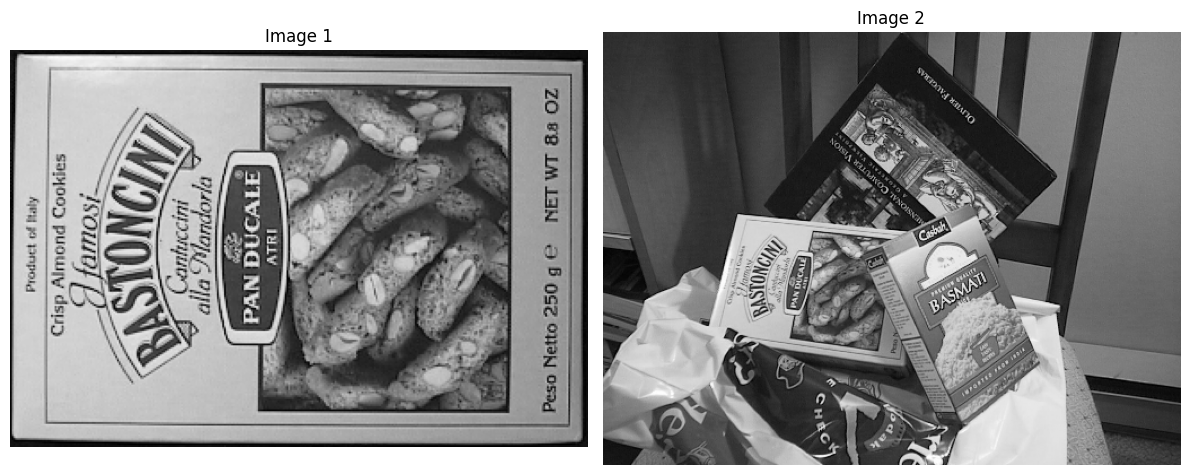

In [7]:
# TODO: Plot the images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

## Creating SIFT detector

We now create the SIFT detoctor using the `cv` library.

Number of keypoints found in image 1: 604
Descriptor shape: (604, 128)


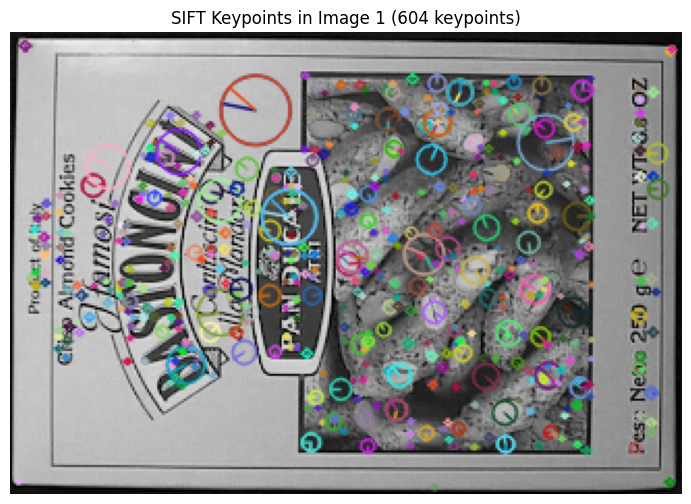

In [8]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints with SIFT
keypoints1 = sift.detect(img1, None)

# compute the descriptors with SIFT
keypoints1, descriptors1 = sift.compute(img1, keypoints1)

print(f"Number of keypoints found in image 1: {len(keypoints1)}")
print(f"Descriptor shape: {descriptors1.shape if descriptors1 is not None else 'None'}")

# draw only keypoints location, not size and orientation
img1_keypoints = cv.drawKeypoints(img1, keypoints1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 6))
plt.imshow(img1_keypoints, cmap='gray')
plt.title(f'SIFT Keypoints in Image 1 ({len(keypoints1)} keypoints)')
plt.axis('off')
plt.show()

Now repeat it for the second image.

Number of keypoints found in image 2: 969
Descriptor shape: (969, 128)


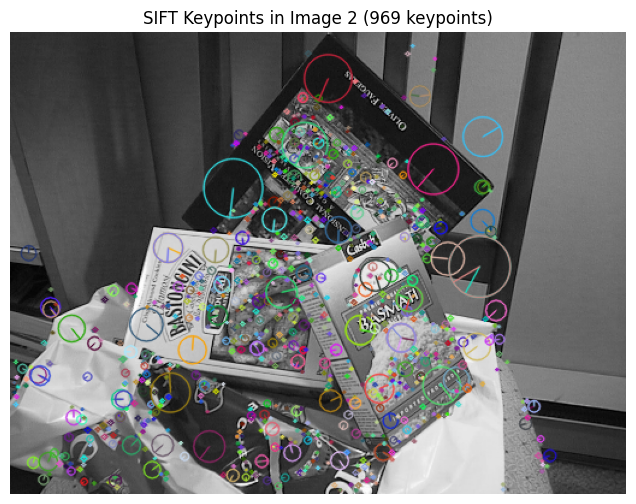

In [9]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints with SIFT
keypoints2 = sift.detect(img2, None)

# compute the descriptors with SIFT
keypoints2, descriptors2 = sift.compute(img2, keypoints2)

print(f"Number of keypoints found in image 2: {len(keypoints2)}")
print(f"Descriptor shape: {descriptors2.shape if descriptors2 is not None else 'None'}")

# draw only keypoints location, not size and orientation
img2_keypoints = cv.drawKeypoints(img2, keypoints2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 6))
plt.imshow(img2_keypoints, cmap='gray')
plt.title(f'SIFT Keypoints in Image 2 ({len(keypoints2)} keypoints)')
plt.axis('off')
plt.show()

## Matching the descriptors

Now complete these two functions that find and plot the matching points.

In [10]:
# Complete: Find nearest keypoints based on Euclidean distance
def find_nearest_keypoints(descriptors1, keypoints1, descriptors2, keypoints2):
    correspondences = []

    for i, descriptor1 in enumerate(descriptors1):
        min_distance = float('inf')
        nearest_keypoint = None

        for j, descriptor2 in enumerate(descriptors2):
            distance = np.linalg.norm(descriptor1 - descriptor2)
            if distance < min_distance:
                min_distance = distance
                nearest_keypoint = j

        correspondences.append((i, nearest_keypoint))

    return correspondences

# Complete: Display the matched keypoints
def display_correspondences(img1, img2, keypoints1, keypoints2, correspondences):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Create a blank image to show both images side by side
    combined_image = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    combined_image[:h1, :w1] = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    combined_image[:h2, w1:] = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    plt.figure(figsize=(12, 6))
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Matched Keypoints')

    # Draw the matching lines
    for idx1, idx2 in correspondences:
        pt1 = tuple(np.round(keypoints1[idx1].pt).astype(int))
        pt2 = tuple(np.round(keypoints2[idx2].pt).astype(int) + np.array([w1, 0]))

        color = tuple(np.random.randint(0, 255, 3).tolist())
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color=np.array(color)/255.0, linewidth=1)
        plt.scatter(*pt1, color=np.array(color)/255.0, s=10)
        plt.scatter(*pt2, color=np.array(color)/255.0, s=10)

    plt.show()

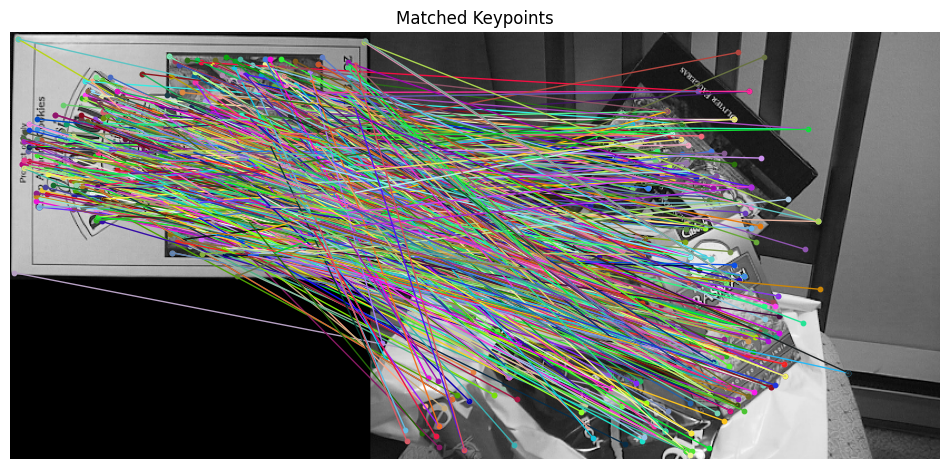

In [11]:
# Find nearest keypoints
correspondences = find_nearest_keypoints(descriptors1, keypoints1, descriptors2, keypoints2)  

# Display correspondences
display_correspondences(img1, img2, keypoints1, keypoints2, correspondences)

Now we compare our implementation to KNN matching.

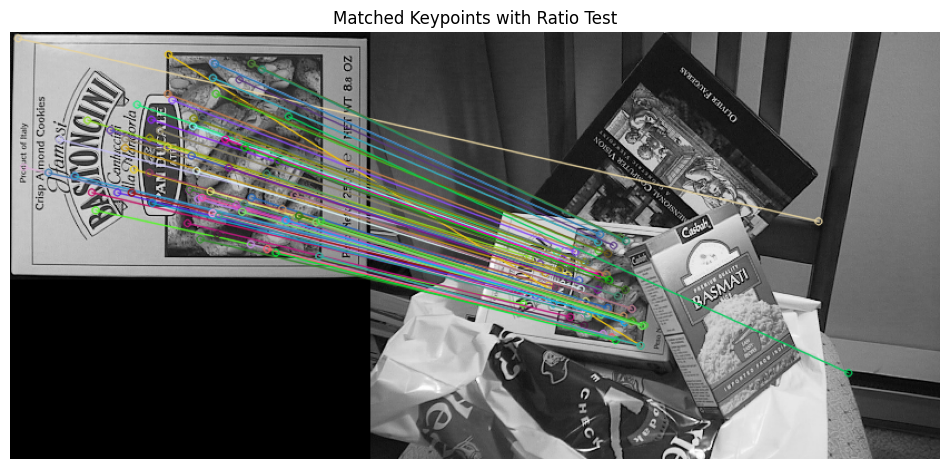

In [12]:
# Step 1: Use BFMatcher with default params
bf = cv.BFMatcher()

# Step 2: Find the two best matches for each descriptor (k=2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Step 3: Apply Lowe's ratio test
good_matches = []
ratio_thresh = 0.75  # You can adjust this threshold
for m, n in matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append([m])  # Note: wrap `m` in a list for drawMatchesKnn

# Step 4: Use cv.drawMatchesKnn to draw the matches
matched_image = cv.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None,
                                  flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
plt.title('Matched Keypoints with Ratio Test')
plt.axis('off')
plt.show()

## Question

Which method produced a better result? Explain why.

# 4. Ball-in-Box Simulation and Tracking with FFT Feature Extraction

In this part, you will complete and extend a Python code that simulates a lossless bouncing ball inside a rotated box, extracts frequency-domain features from video frames using FFT, and tracks the ball’s motion in the generated video. You will also demonstrate your code by uploading and processing your own video files. Follow the tasks below:

<center>
  <img src="https://raw.githubusercontent.com/BlackRanger4/Signals-and-Systems---CHW/main/tracked_output.gif" width="200px">
</center>


---

### Part 1: Simulating a Lossless Ball in a Rotated Box

The function `simulate_ball` should simulate a ball bouncing inside a rotated rectangular boundary without energy loss. Some parts of the collision-handling code have been removed, you must:

1. **Complete the rotated-box collision logic** by filling in the missing code that:  
   a. Computes the ball’s signed distance to each wall of the rotated box using the wall’s normal vector.  
   b. Detects when the ball overlaps (penetrates) the wall by comparing the distance to the ball’s radius.  
   c. Reflects the velocity vector about the wall’s normal to produce a perfectly elastic (lossless) bounce.  

2. **Ensure the ball never loses speed** (i.e., no damping).  
3. **Validate** that your simulation keeps the ball inside the box and the window boundaries for the entire duration.

---

### Part 2: Feature-Based Tracking of the Ball in Video

Using the simulated video `output.mp4` and the exported CSV (`frame, x, y`), implement a tracking algorithm that:

1. Reads the video and CSV of ground-truth positions.
2. Extracts an initial template patch around the known ball position in the first frame.
3. For each subsequent frame:
   - Crops a larger search window around the previous ball position.
   - Applies your `extract_fft_features` to both the template and every sliding window in the search region.
   - **Compares feature maps** (e.g., via sum of squared differences or dot product) to select the best-matching patch.
   - Updates the ball’s estimated center based on the best match.
   - Draws a bounding box around the estimated position and writes the output frame.
4. Writes the tracked video to `tracked_output.mp4` and computes tracking error metrics (e.g., average Euclidean distance to ground truth).






In [13]:
import cv2
import numpy as np
import math

def rotate_point(point, center, angle):
    """Rotate a point around a center by given angle (degrees)"""
    angle_rad = math.radians(angle)
    ox, oy = center
    px, py = point

    qx = ox + math.cos(angle_rad) * (px - ox) - math.sin(angle_rad) * (py - oy)
    qy = oy + math.sin(angle_rad) * (px - ox) + math.cos(angle_rad) * (py - oy)
    return (qx, qy)

def point_in_rotated_box(point, corners):
    """Check if point is inside rotated box using cross product method"""
    x, y = point
    inside = True
    
    for i in range(4):
        p1 = corners[i]
        p2 = corners[(i+1) % 4]
        
        # Vector from p1 to p2
        edge = (p2[0] - p1[0], p2[1] - p1[1])
        # Vector from p1 to point
        to_point = (x - p1[0], y - p1[1])
        
        # Cross product (2D)
        cross = edge[0] * to_point[1] - edge[1] * to_point[0]
        
        # For a convex polygon wound counter-clockwise, point is inside if all cross products have same sign
        if i == 0:
            sign = cross >= 0
        elif (cross >= 0) != sign:
            inside = False
            break
    
    return inside

def simulate_ball(window_size, box, initial_speed, G, fps, start_pos, box_angle=0, ball_radius=10, duration=10):
    """Simulate ball bouncing in rotated box"""
    window_width, window_height = window_size
    box_x, box_y, box_width, box_height = box
    start_x, start_y = start_pos
    vx_initial, vy_initial = initial_speed
    dt = 1.0 / fps

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output.mp4', fourcc, fps, (window_width, window_height))

    x, y = start_x, start_y
    vx = vx_initial
    vy = vy_initial
    radius = ball_radius
    positions = []  # List to store ball positions

    # Calculate rotated box corners
    box_center = (box_x + box_width/2, box_y + box_height/2)
    original_corners = [
        (box_x, box_y),
        (box_x + box_width, box_y),
        (box_x + box_width, box_y + box_height),
        (box_x, box_y + box_height)
    ]
    rotated_corners = [rotate_point(corner, box_center, box_angle) for corner in original_corners]

    # Check initial position is inside box
    if not point_in_rotated_box((x, y), rotated_corners):
        raise ValueError("Ball must start inside the box!")

    for frame in range(int(fps * duration)):
        # Apply gravity
        vy += G * dt

        prev_x, prev_y = x, y
        # Update position
        x += vx * dt
        y += vy * dt

        # Window boundary collisions (keep ball in window)
        if x - radius < 0:
            x = radius
            vx = -vx
        elif x + radius > window_width:
            x = window_width - radius
            vx = -vx
        if y - radius < 0:
            y = radius
            vy = -vy
        elif y + radius > window_height:
            y = window_height - radius
            vy = -vy

        # Rotated box collision detection
        ball_pos = np.array([x, y])
        
        # Check collision with each wall of rotated box
        for i in range(4):
            p1 = np.array(rotated_corners[i])
            p2 = np.array(rotated_corners[(i+1) % 4])
            
            # Edge vector
            edge = p2 - p1
            edge_length = np.linalg.norm(edge)
            edge_unit = edge / edge_length
            
            # Normal vector (perpendicular to edge, pointing inward)
            normal = np.array([-edge_unit[1], edge_unit[0]])
            
            # Vector from p1 to ball center
            to_ball = ball_pos - p1
            
            # Distance from ball center to line (signed)
            distance_to_line = np.dot(to_ball, normal)
            
            # Check if ball is too close to this wall (collision)
            if distance_to_line < radius:
                # Ball is penetrating the wall, reflect velocity
                penetration = radius - distance_to_line
                
                # Move ball out of wall
                ball_pos = ball_pos + normal * penetration
                x, y = ball_pos[0], ball_pos[1]
                
                # Reflect velocity
                velocity = np.array([vx, vy])
                velocity_normal = np.dot(velocity, normal)
                
                if velocity_normal < 0:  # Only reflect if moving towards wall
                    velocity = velocity - 2 * velocity_normal * normal
                    vx, vy = velocity[0], velocity[1]

        # Record current position
        positions.append((x, y))

        # Draw frame
        frame_img = np.full((window_height, window_width, 3), 255, dtype=np.uint8)

        # Draw rotated box
        box_points = np.array(rotated_corners, np.int32)
        cv2.polylines(frame_img, [box_points], True, (0, 0, 255), 2)

        # Draw ball
        cv2.circle(frame_img, (int(x), int(y)), radius, (255, 0, 0), -1)
        # Draw center marker
        cv2.circle(frame_img, (int(x), int(y)), 2, (0, 0, 0), -1)

        out.write(frame_img)

    out.release()
    return positions

# Simulation parameters
window_size = (800, 600)  # width, height
box = (150, 100, 300, 200)  # x, y, width, height
initial_speed = (200, -150)    # pixels/sec (vx, vy)
G = 500                      # pixels/sec² (gravity)
fps = 30
start_pos = (300, 200)       # Center of box
box_angle = 15               # Degrees

print("Starting ball simulation...")
print(f"Window size: {window_size}")
print(f"Box: {box} rotated by {box_angle}°")
print(f"Initial speed: {initial_speed}")
print(f"Gravity: {G}")
print(f"Duration: 10 seconds at {fps} FPS")

try:
    positions = simulate_ball(window_size, box, initial_speed, G, fps, start_pos, box_angle)
    
    # Save positions to file
    with open('ball_positions.csv', 'w') as f:
        f.write("frame,x,y\n")
        for i, (x, y) in enumerate(positions):
            f.write(f"{i},{x:.2f},{y:.2f}\n")
    
    print(f"\nSimulation complete! Saved {len(positions)} positions to ball_positions.csv")
    print(f"Output video saved as 'output.mp4'")
    
except Exception as e:
    print(f"Error during simulation: {e}")
    import traceback
    traceback.print_exc()

Starting ball simulation...
Window size: (800, 600)
Box: (150, 100, 300, 200) rotated by 15°
Initial speed: (200, -150)
Gravity: 500
Duration: 10 seconds at 30 FPS

Simulation complete! Saved 300 positions to ball_positions.csv
Output video saved as 'output.mp4'


Starting ball simulation...
Window size: (800, 600)
Box: (150, 100, 300, 200) rotated by 15°
Initial speed: (200, -150)
Gravity: 500
Duration: 10 seconds at 30 FPS

Simulation complete! Saved 300 positions to ball_positions.csv
Output video saved as 'output.mp4'


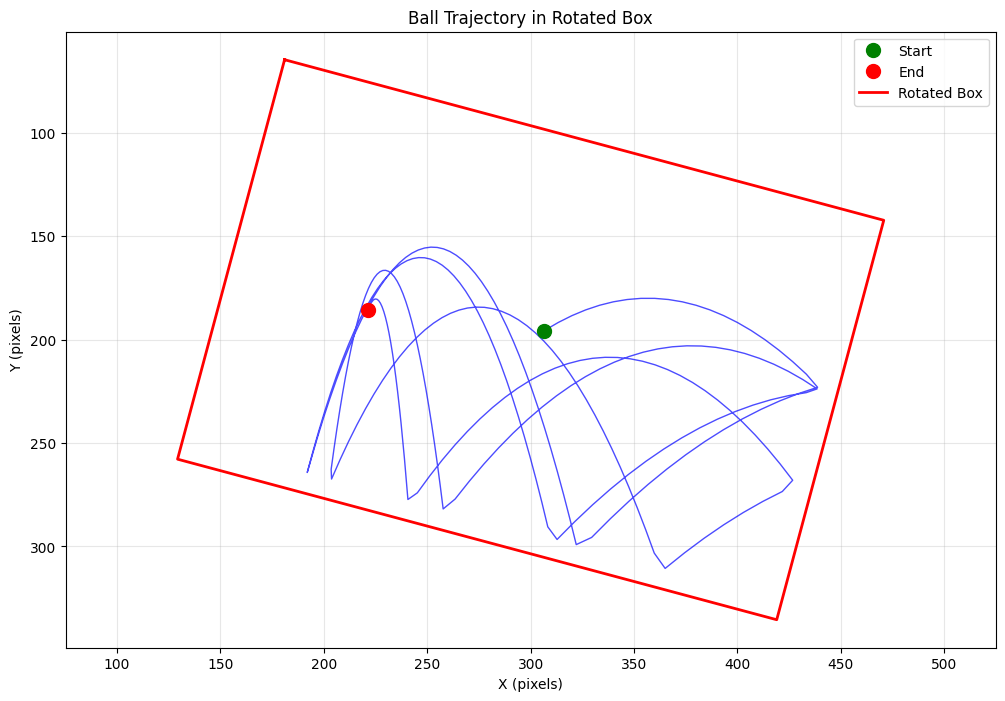

Loaded 300 ground truth positions
Video properties: 800x600, 30.0 FPS, 300 frames
Initial ball position: (306.7, 195.6)
Starting tracking...
Processed 30/300 frames, avg error: 81.15px
Processed 60/300 frames, avg error: 55.90px
Processed 90/300 frames, avg error: 97.74px
Processed 120/300 frames, avg error: 58.38px
Processed 150/300 frames, avg error: 85.92px
Processed 180/300 frames, avg error: 67.86px
Processed 210/300 frames, avg error: 93.47px
Processed 240/300 frames, avg error: 49.62px
Processed 270/300 frames, avg error: 73.85px
Processed 300/300 frames, avg error: 80.86px

Tracking complete!
Output saved to: tracked_output.mp4
Tracking Statistics:
  Average error: 74.45 pixels
  Maximum error: 140.20 pixels
  Standard deviation: 31.00 pixels
  Frames processed: 299


In [14]:
import cv2
import numpy as np
import pandas as pd
from math import cos, sin, radians
import matplotlib.pyplot as plt

# Parameters
video_path = 'output.mp4'                        # input video file
csv_path = 'ball_positions.csv'                          # CSV with columns frame,x,y
template_size = (40,40)                     # size of tracking box (width, height)
search_factor = 3                     # search window = template_size * search_factor
output_path = 'tracked_output.mp4'      # output video path

# Simulation parameters
window_size = (800, 600)  # width, height
box = (150, 100, 300, 200)  # x, y, width, height
initial_speed = (200, -150)    # pixels/sec (vx, vy)
G = 500                      # pixels/sec² (gravity)
fps = 30
start_pos = (300, 200)       # Center of box
box_angle = 15               # Degrees

print("Starting ball simulation...")
print(f"Window size: {window_size}")
print(f"Box: {box} rotated by {box_angle}°")
print(f"Initial speed: {initial_speed}")
print(f"Gravity: {G}")
print(f"Duration: 10 seconds at {fps} FPS")

try:
    positions = simulate_ball(window_size, box, initial_speed, G, fps, start_pos, box_angle)
    
    # Save positions to file
    with open('ball_positions.csv', 'w') as f:
        f.write("frame,x,y\n")
        for i, (x, y) in enumerate(positions):
            f.write(f"{i},{x:.2f},{y:.2f}\n")
    
    print(f"\nSimulation complete! Saved {len(positions)} positions to ball_positions.csv")
    print(f"Output video saved as 'output.mp4'")
    
    # Plot trajectory
    x_coords = [pos[0] for pos in positions]
    y_coords = [pos[1] for pos in positions]
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_coords, y_coords, 'b-', alpha=0.7, linewidth=1)
    plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start')
    plt.plot(x_coords[-1], y_coords[-1], 'ro', markersize=10, label='End')
    
    # Draw box outline
    box_x, box_y, box_width, box_height = box
    box_center = (box_x + box_width/2, box_y + box_height/2)
    original_corners = [
        (box_x, box_y),
        (box_x + box_width, box_y),
        (box_x + box_width, box_y + box_height),
        (box_x, box_y + box_height),
        (box_x, box_y)  # Close the box
    ]
    
    angle_rad = radians(box_angle)
    rotated_corners = []
    for corner in original_corners:
        ox, oy = box_center
        px, py = corner
        qx = ox + cos(angle_rad) * (px - ox) - sin(angle_rad) * (py - oy)
        qy = oy + sin(angle_rad) * (px - ox) + cos(angle_rad) * (py - oy)
        rotated_corners.append((qx, qy))
    
    box_x_coords = [corner[0] for corner in rotated_corners]
    box_y_coords = [corner[1] for corner in rotated_corners]
    plt.plot(box_x_coords, box_y_coords, 'r-', linewidth=2, label='Rotated Box')
    
    plt.xlim(0, window_size[0])
    plt.ylim(window_size[1], 0)  # Invert y-axis to match image coordinates
    plt.xlabel('X (pixels)')
    plt.ylabel('Y (pixels)')
    plt.title('Ball Trajectory in Rotated Box')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()
    
except Exception as e:
    print(f"Error during simulation: {e}")
    import traceback
    traceback.print_exc()

# Load CSV of ball positions
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} ground truth positions")

# Open video capture
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError(f"Cannot open video: {video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video properties: {frame_w}x{frame_h}, {fps} FPS, {total_frames} frames")

# Video writer for output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_w, frame_h))

# Helper: extract patch with boundary checks
def get_patch(img, center, size):
    """Extract a patch from image with boundary checks"""
    cx, cy = int(center[0]), int(center[1])
    w, h = size
    
    # Calculate patch boundaries
    x1 = max(0, cx - w//2)
    y1 = max(0, cy - h//2)
    x2 = min(img.shape[1], cx + w//2)
    y2 = min(img.shape[0], cy + h//2)
    
    # Extract patch
    patch = img[y1:y2, x1:x2]
    
    # Pad if necessary
    if patch.shape[0] < h or patch.shape[1] < w:
        padded = np.zeros((h, w), dtype=img.dtype)
        py1 = (h - patch.shape[0]) // 2
        px1 = (w - patch.shape[1]) // 2
        padded[py1:py1+patch.shape[0], px1:px1+patch.shape[1]] = patch
        patch = padded
    
    return patch, (x1, y1)

# Helper: extract FFT features
def extract_fft_features(img, center, size):
    """Extract FFT-based features from a patch"""
    patch, offset = get_patch(img, center, size)
    
    # Convert to float and normalize
    patch_float = patch.astype(np.float32) / 255.0
    
    # Apply window function to reduce edge effects
    window = np.outer(np.hanning(patch.shape[0]), np.hanning(patch.shape[1]))
    windowed_patch = patch_float * window
    
    # 2D FFT
    fft_patch = np.fft.fft2(windowed_patch)
    
    # Use magnitude spectrum as features
    magnitude = np.abs(fft_patch)
    
    # Shift zero frequency to center
    magnitude_shifted = np.fft.fftshift(magnitude)
    
    return magnitude_shifted, offset

# Read first frame and initialize template
ret, prev_frame = cap.read()
if not ret:
    raise ValueError('Cannot read first frame')
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Initialize center from CSV first row
init = df.iloc[0]
center = (init['x'], init['y'])
print(f"Initial ball position: ({center[0]:.1f}, {center[1]:.1f})")

# Extract initial template patch
template, _ = get_patch(prev_gray, center, template_size)
template_features, _ = extract_fft_features(prev_gray, center, template_size)

# Tracking metrics
errors = []
frame_idx = 1

print("Starting tracking...")

while True:
    ret, frame = cap.read()
    if not ret or frame_idx >= len(df):
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute search window size
    sw = template_size[0] * search_factor
    sh = template_size[1] * search_factor
    
    # Extract search window features
    search_features, search_offset = extract_fft_features(gray, center, (sw, sh))

    best_score = -np.inf
    best_offset = (0, 0)

    tw, th = template_size
    sf_h, sf_w = search_features.shape

    # Slide template-sized windows over search region
    for y in range(0, sf_h - th + 1, 2):  # Step by 2 for efficiency
        for x in range(0, sf_w - tw + 1, 2):
            # Extract candidate patch features
            candidate_features = search_features[y:y+th, x:x+tw]
            
            # Normalize both feature sets
            template_norm = (template_features - template_features.mean()) / (template_features.std() + 1e-8)
            candidate_norm = (candidate_features - candidate_features.mean()) / (candidate_features.std() + 1e-8)
            
            # Compute similarity (normalized cross-correlation)
            score = np.sum(template_norm * candidate_norm)
            
            if score > best_score:
                best_score = score
                # Convert back to image coordinates
                search_center_x = center[0] - sw//2 + search_offset[0]
                search_center_y = center[1] - sh//2 + search_offset[1]
                best_offset = (x - sw//2 + tw//2, y - sh//2 + th//2)

    # Update center position
    dx, dy = best_offset
    center = (center[0] + dx, center[1] + dy)
    
    # Clamp to image boundaries
    center = (max(tw//2, min(frame_w - tw//2, center[0])), 
              max(th//2, min(frame_h - th//2, center[1])))

    # Calculate tracking error
    gt_row = df.iloc[frame_idx]
    gt_center = (gt_row['x'], gt_row['y'])
    error = np.sqrt((center[0] - gt_center[0])**2 + (center[1] - gt_center[1])**2)
    errors.append(error)

    # Draw tracking rectangle (green) and ground truth (red)
    x1 = int(center[0] - template_size[0]//2)
    y1 = int(center[1] - template_size[1]//2)
    x2 = x1 + template_size[0]
    y2 = y1 + template_size[1]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green - tracked
    
    # Ground truth rectangle
    gt_x1 = int(gt_center[0] - template_size[0]//2)
    gt_y1 = int(gt_center[1] - template_size[1]//2)
    gt_x2 = gt_x1 + template_size[0]
    gt_y2 = gt_y1 + template_size[1]
    cv2.rectangle(frame, (gt_x1, gt_y1), (gt_x2, gt_y2), (0, 0, 255), 2)  # Red - ground truth
    
    # Add text showing error
    cv2.putText(frame, f'Error: {error:.1f}px', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(frame, f'Frame: {frame_idx}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Write frame to output
    out.write(frame)

    # Update template for next iteration (adaptive tracking)
    if frame_idx % 5 == 0:  # Update template every 5 frames
        template, _ = get_patch(gray, center, template_size)
        template_features, _ = extract_fft_features(gray, center, template_size)

    frame_idx += 1
    
    if frame_idx % 30 == 0:  # Progress update
        print(f"Processed {frame_idx}/{len(df)} frames, avg error: {np.mean(errors[-30:]):.2f}px")

# Release resources
cap.release()
out.release()

# Calculate and display tracking statistics
avg_error = np.mean(errors)
max_error = np.max(errors)
std_error = np.std(errors)

print(f"\nTracking complete!")
print(f"Output saved to: {output_path}")
print(f"Tracking Statistics:")
print(f"  Average error: {avg_error:.2f} pixels")
print(f"  Maximum error: {max_error:.2f} pixels")
print(f"  Standard deviation: {std_error:.2f} pixels")
print(f"  Frames processed: {len(errors)}")